In [1]:
import importlib
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import minmax_scale
from sklearn import cluster
from sklearn import decomposition
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.collections as collections
import scipy
import shapefile
%matplotlib inline
import seaborn as sns

In [2]:
excel_file = pd.ExcelFile('source_data.xlsx')

In [3]:
sheet0 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[0],
        skiprows=[0],
        header=1,
    )
sheet0 = sheet0[sheet0.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet0.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [4]:
sheet0.head()

Region  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
0  Белгородская область    23    21    27    23    19    16    16    14    15   
1      Брянская область    20    19    20    23    24    17    23    21    21   
2  Владимирская область    35    32    30    30    25    25    24    23    22   
3   Воронежская область    57    65    66    60    58    58    59    57    56   
4    Ивановская область    30    28    23    21    19    21    17    20    19   

   2014  2015  
0    16   NaN  
1    22   NaN  
2    25   NaN  
3    53   NaN  
4    20   NaN

In [5]:
sheet1 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[1],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet1 = sheet1[sheet1.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet1.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [6]:
sheet2 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[2],
        skiprows=[0, 1],
        header=1,
    )
sheet2 = sheet2[sheet2.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet2.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [7]:
sheet3 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[3],
        skiprows=[0, 1],
        header=1,
    )
sheet3 = sheet3[sheet3.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet3.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [8]:
sheet4 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[4],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet4 = sheet4[sheet4.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet4.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [9]:
sheet5 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[5],
        skiprows=[0, 1],
        header=1,
    )
sheet5 = sheet5[sheet5.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet5.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [10]:
sheet6 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[6],
        skiprows=[0, 1, 2, 3, 4],
        header=1,
    )
sheet6 = sheet6[sheet6.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet6.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [11]:
sheet7 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[7],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet7 = sheet7[sheet7.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet7.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [12]:
sheet8 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[8],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet8 = sheet8[sheet8.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet8.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [13]:
sheet9 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[9],
        skiprows=[0, 1, 2, 3],
        header=1,
    )
sheet9 = sheet9[sheet9.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet9.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [14]:
sheet10 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[10],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet10 = sheet10[sheet10.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet10.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [15]:
sheet11 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[11],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet11 = sheet11[sheet11.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet11.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [16]:
sheet12 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[12],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet12 = sheet12[sheet12.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet12.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [17]:
sheet13 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[13],
        skiprows=[0, 1],
        header=1,
    )
sheet13 = sheet13[sheet13.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet13.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [18]:
sheet14 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[14],
        skiprows=[0, 1],
        header=1,
    )
sheet14 = sheet14[sheet14.columns.drop(['Unnamed: 0', 'Unnamed: 1'])]
sheet14.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [19]:
sheet15 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[15],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet15 = sheet15[sheet15.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet15.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [20]:
sheet16 = pd.read_excel(
        'source_data.xlsx',
        sheetname=excel_file.sheet_names[16],
        skiprows=[0, 1, 2],
        header=1,
    )
sheet16 = sheet16[sheet16.columns.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])]
sheet16.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [21]:
sheet17 = pd.read_excel('source_data_1.xlsx')
sheet17 = sheet17[sheet17.columns.drop(['Unnamed: 11', 'ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ'])]
sheet17.rename_axis({'Область /год': 'Region'} ,axis='columns', inplace=True)

In [22]:
list_of_df = []
list_of_df.append([sheet0, 'OrganizationNum'])
list_of_df.append([sheet1, 'StaffNum'])
list_of_df.append([sheet2, 'PhDNum'])
list_of_df.append([sheet3, 'Ph.DNum'])
list_of_df.append([sheet4, 'PostgraduateNum'])
list_of_df.append([sheet5, 'DoctoralNum'])
list_of_df.append([sheet6, 'PatentNum'])
list_of_df.append([sheet7, 'UsefulPatentsNum'])
list_of_df.append([sheet8, 'CreatedTechnologyNum'])
list_of_df.append([sheet9, 'UsefulTechnologyNum'])
list_of_df.append([sheet10, 'ProportionOfOrganizationsToUseInternet'])
list_of_df.append([sheet11, 'ProportionOfInnovativeOrgainzations'])
list_of_df.append([sheet12, 'TechnologicalInnovationsCost'])
list_of_df.append([sheet13, 'AmountOfInnovativeProducts'])
list_of_df.append([sheet14, 'ProportionOfInnovativeProducts'])
list_of_df.append([sheet15, 'Population'])
list_of_df.append([sheet16, 'GrossProduct'])
list_of_df.append([sheet17, 'InternalCosts'])

In [23]:
features_names_ru = [
    'ОРГАНИЗАЦИИ, ВЫПОЛНЯЮЩИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ',
    'численность персонала без ученых степеней, занятых НИОКР',
    'Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации показатель кандидата наук- человек',
    'Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации показатель доктора наук- человек',
    'Численность аспирантов по субъектам Российской Федерации - человек',
    'Численность докторантов по субъектам Российской Федерации 0человек',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ИЗОБРЕТЕНИЯ',
    'КОЛИЧЕСТВО ПАТЕНТОВ, ВЫДАННЫХ НА ПОЛЕЗНЫЕ МОДЕЛИ',
    'РАЗРАБОТАННЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ',
    'УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ ИСПОЛЬЗОВАВШИХ  ИНТЕРНЕТ ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ ) (В ПРОЦЕНТАХ ОТ ОБЩЕГО ЧИСЛА ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ СООТВЕТСТВУЮЩЕГО СУБЪЕКТА РОССИЙСКОЙ ФЕДЕРАЦИИ)',
    'ИННОВАЦИОННАЯ АКТИВНОСТЬ ОРГАНИЗАЦИЙ (УДЕЛЬНЫЙ ВЕС ОРГАНИЗАЦИЙ, ОСУЩЕСТВЛЯВШИХ ТЕХНОЛОГИЧЕСКИЕ, ОРГАНИЗАЦИОННЫЕ, МАРКЕТИНГОВЫЕ ИННОВАЦИИ В ОТЧЕТНОМ ГОДУ, В ОБЩЕМ ЧИСЛЕ ОБСЛЕДОВАННЫХ ОРГАНИЗАЦИЙ ( %)',
    'ЗАТРАТЫ НА ТЕХНОЛОГИЧЕСКИЕ ИННОВАЦИИ ОРГАНИЗАЦИЙ (руб)',
    'ОБЪЕМ ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ (МИЛЛИОНОВ РУБЛЕЙ)',
    'УДЕЛЬНЫЙ ВЕС ИННОВАЦИОННЫХ ТОВАРОВ, РАБОТ, УСЛУГ В ОБЩЕМ ОБЪЕМЕ ОТГРУЖЕННЫХ ТОВАРОВ, ВЫПОЛНЕННЫХ РАБОТ, УСЛУГ1), ПО СУБЪЕКТАМ РОССИЙСКОЙ ФЕДЕРАЦИИ (%)',
    'численность населения по субъектам российской федерации (оценка на конец года; тысяч человек)',
    'Валовой региональный продукт по субъектам Российской Федерации (в текущих  ценах;миллионов рублей)'
]
print(len(features_names_ru))

17


In [24]:
for i, df_container in enumerate(list_of_df):
    df = df_container[0]
    list_of_df[i][0] = df[df.Region != 'ВСЕГО']    

In [25]:
merged_df_list = []
for year in range(2005, 2015):
    result_df, feature_name = list_of_df[0]
    result_df = result_df[['Region', year]]

    #result_df.rename_axis({year: feature_name} ,axis='columns', inplace=True)
    result_df = result_df.rename_axis({year: feature_name} ,axis='columns')
    
    merged_df_list.append(result_df)
    
    for i in range(1, 18):
        merged_df, feature_name = list_of_df[i]
        merged_df = merged_df[['Region', year]]
        #merged_df.rename_axis({year: feature_name} ,axis='columns', inplace=True)
        merged_df = merged_df.rename_axis({year: feature_name} ,axis='columns')
        merged_df_list[year - 2005] = pd.merge(
            merged_df_list[year - 2005],
            merged_df,
            on='Region')

In [26]:
def str_to_num(s):
    if isinstance(s, str):
        s = s.replace(',', '.')
        s1 = s.replace(',', '')
        if s1.isdigit():
            return float(s)
    return s

In [27]:
df0 = merged_df_list[0]

In [28]:
def detect_minus(x):
    if x == '-':
        print(x)
        return True
    return False

In [29]:
df0 = df0.applymap(str_to_num)
df0.set_value(36, 'PostgraduateNum', 0)

Region  OrganizationNum  StaffNum  PhDNum  Ph.DNum  \
0           Белгородская область               23       559      92       15   
1               Брянская область               20      1136      44        8   
2           Владимирская область               35      2337     297       52   
3            Воронежская область               57      6114     783      119   
4             Ивановская область               30       435     196       48   
5              Калужская область               33      3495     787      205   
6            Костромская область                8        71      18        2   
7                Курская область               23       713      66       24   
8               Липецкая область               10        49      43       27   
9             Московская область              206     30899    6456     1659   
10             Орловская область               18       330      87       19   
11             Рязанская область               16      1052     132       23   
12            Смоленская область               14       299      51        8   
13            Тамбовская область               23       828     145       24   
14              Тверская область               42      2583     423       54   
15              Тульская область               22      3698     154       43   
16           Ярославская область               26      1769     291       61   
17                        Москва              787     93778   32695    11234   
18            Республика Карелия               16       216     278       70   
19               Республика Коми               19       745     335       82   
20         Архангельская область               24       723     104        0   
21     Ненецкий автономный округ                2        12       1        0   
22           Вологодская область               15       215      46        6   
23       Калинингpадская область               14       638     105       14   
24         Ленинградская область               17      1804     501      103   
25            Мурманская область               28       526     384      107   
26          Новгородская область               10       471      19        1   
27             Псковская область               10       111      30        3   
28             Республика Адыгея                3        49      28       14   
29           Республика Калмыкия                8        67      66       11   
..                           ...              ...       ...     ...      ...   
47          Оренбургская область               14       335     139       37   
48            Пензенская область               24      2817      95       15   
49             Самарская область               51      6335     458      106   
50           Саратовская область               57      2500     560      164   
51           Ульяновская область               22      2190     196       49   
52            Курганская область               15       395      71       31   
53          Свердловская область              117      7957    1764      535   
54             Тюменская область               33      1577     240       71   
55           Челябинская область               40      6834     623      138   
56              Республика Алтай                6        39      29        3   
57            Республика Бурятия               17       409     386      102   
58               Республика Тыва                6        87      59       11   
59            Республика Хакасия                3       103      92       22   
60                Алтайский край               35       900     237       59   
61            Забайкальский край               10       234       0        0   
62             Красноярский край               60      2932     566      195   
63             Иркутская область               35      1561     981      345   
64           Кемеровская область               29       567     172       54   
65         Новосибирская о

In [30]:
df0_names_row_numbers_map = [(i, name) for i, name in enumerate(df0['Region'])]
df0_names_columns_numbers_map = [(i, name) for i, name in enumerate(df0.columns)]

In [31]:
df0_drop_regions = df0[df0.columns.drop(['Region'])]

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
df0_scaled = pd.DataFrame(scaler.fit_transform(df0_drop_regions), columns=df0_drop_regions.columns)

In [35]:
df0_scaled.corr().round(2)

OrganizationNum  StaffNum  PhDNum  \
OrganizationNum                                    1.00      0.98    0.98   
StaffNum                                           0.98      1.00    0.98   
PhDNum                                             0.98      0.98    1.00   
Ph.DNum                                            0.98      0.97    1.00   
PostgraduateNum                                    0.97      0.95    0.98   
DoctoralNum                                        0.96      0.93    0.96   
PatentNum                                          0.99      0.98    0.98   
UsefulPatentsNum                                   0.96      0.96    0.94   
CreatedTechnologyNum                               0.88      0.89    0.83   
UsefulTechnologyNum                                0.57      0.63    0.49   
ProportionOfOrganizationsToUseInternet             0.33      0.31    0.32   
ProportionOfInnovativeOrgainzations                0.29      0.28    0.22   
TechnologicalInnovationsCost                       0.55      0.54    0.46   
AmountOfInnovativeProducts                         0.29      0.29    0.21   
ProportionOfInnovativeProducts                     0.21      0.21    0.14   
Population                                         0.82      0.79    0.73   
GrossProduct                                       0.98      0.96    0.98   
InternalCosts                                      0.98      1.00    0.99   

                                        Ph.DNum  PostgraduateNum  DoctoralNum  \
OrganizationNum                            0.98             0.97         0.96   
StaffNum                                   0.97             0.95         0.93   
PhDNum                                     1.00             0.98         0.96   
Ph.DNum                                    1.00             0.98         0.96   
PostgraduateNum                            0.98             1.00         0.99   
DoctoralNum                                0.96             0.99         1.00   
PatentNum                                  0.97             0.96         0.95   
UsefulPatentsNum                           0.93             0.94         0.92   
CreatedTechnologyNum                       0.82             0.83         0.81   
UsefulTechnologyNum                        0.46             0.46         0.44   
ProportionOfOrganizationsToUseInternet     0.31             0.33         0.35   
ProportionOfInnovativeOrgainzations        0.21             0.26         0.31   
TechnologicalInnovationsCost               0.44             0.48         0.50   
AmountOfInnovativeProducts                 0.19             0.23         0.24   
ProportionOfInnovativeProducts             0.13             0.17         0.18   
Population                                 0.71             0.75         0.76   
GrossProduct                               0.98             0.98         0.96   
InternalCosts                              0.98             0.96         0.94   

                                        PatentNum  UsefulPatentsNum  \
OrganizationNum                              0.99              0.96   
StaffNum                                     0.98              0.96   
PhDNum                                       0.98              0.94   
Ph.DNum                                      0.97              0.93   
PostgraduateNum                              0.96              0.94   
DoctoralNum                                  0.95              0.92   
PatentNum                                    1.00              0.97   
UsefulPatentsNum                             0.97              1.00   
CreatedTechnologyNum                         0.85              0.89   
UsefulTechnologyNum                          0.56              0.61   
ProportionOfOrganizationsToUseInternet       0.34              0.32   
ProportionOfInnovativeOrgainzations          0.29              0.34   
TechnologicalInnovationsCost                 0.55              0.67   
AmountOfInnovativeProducts                

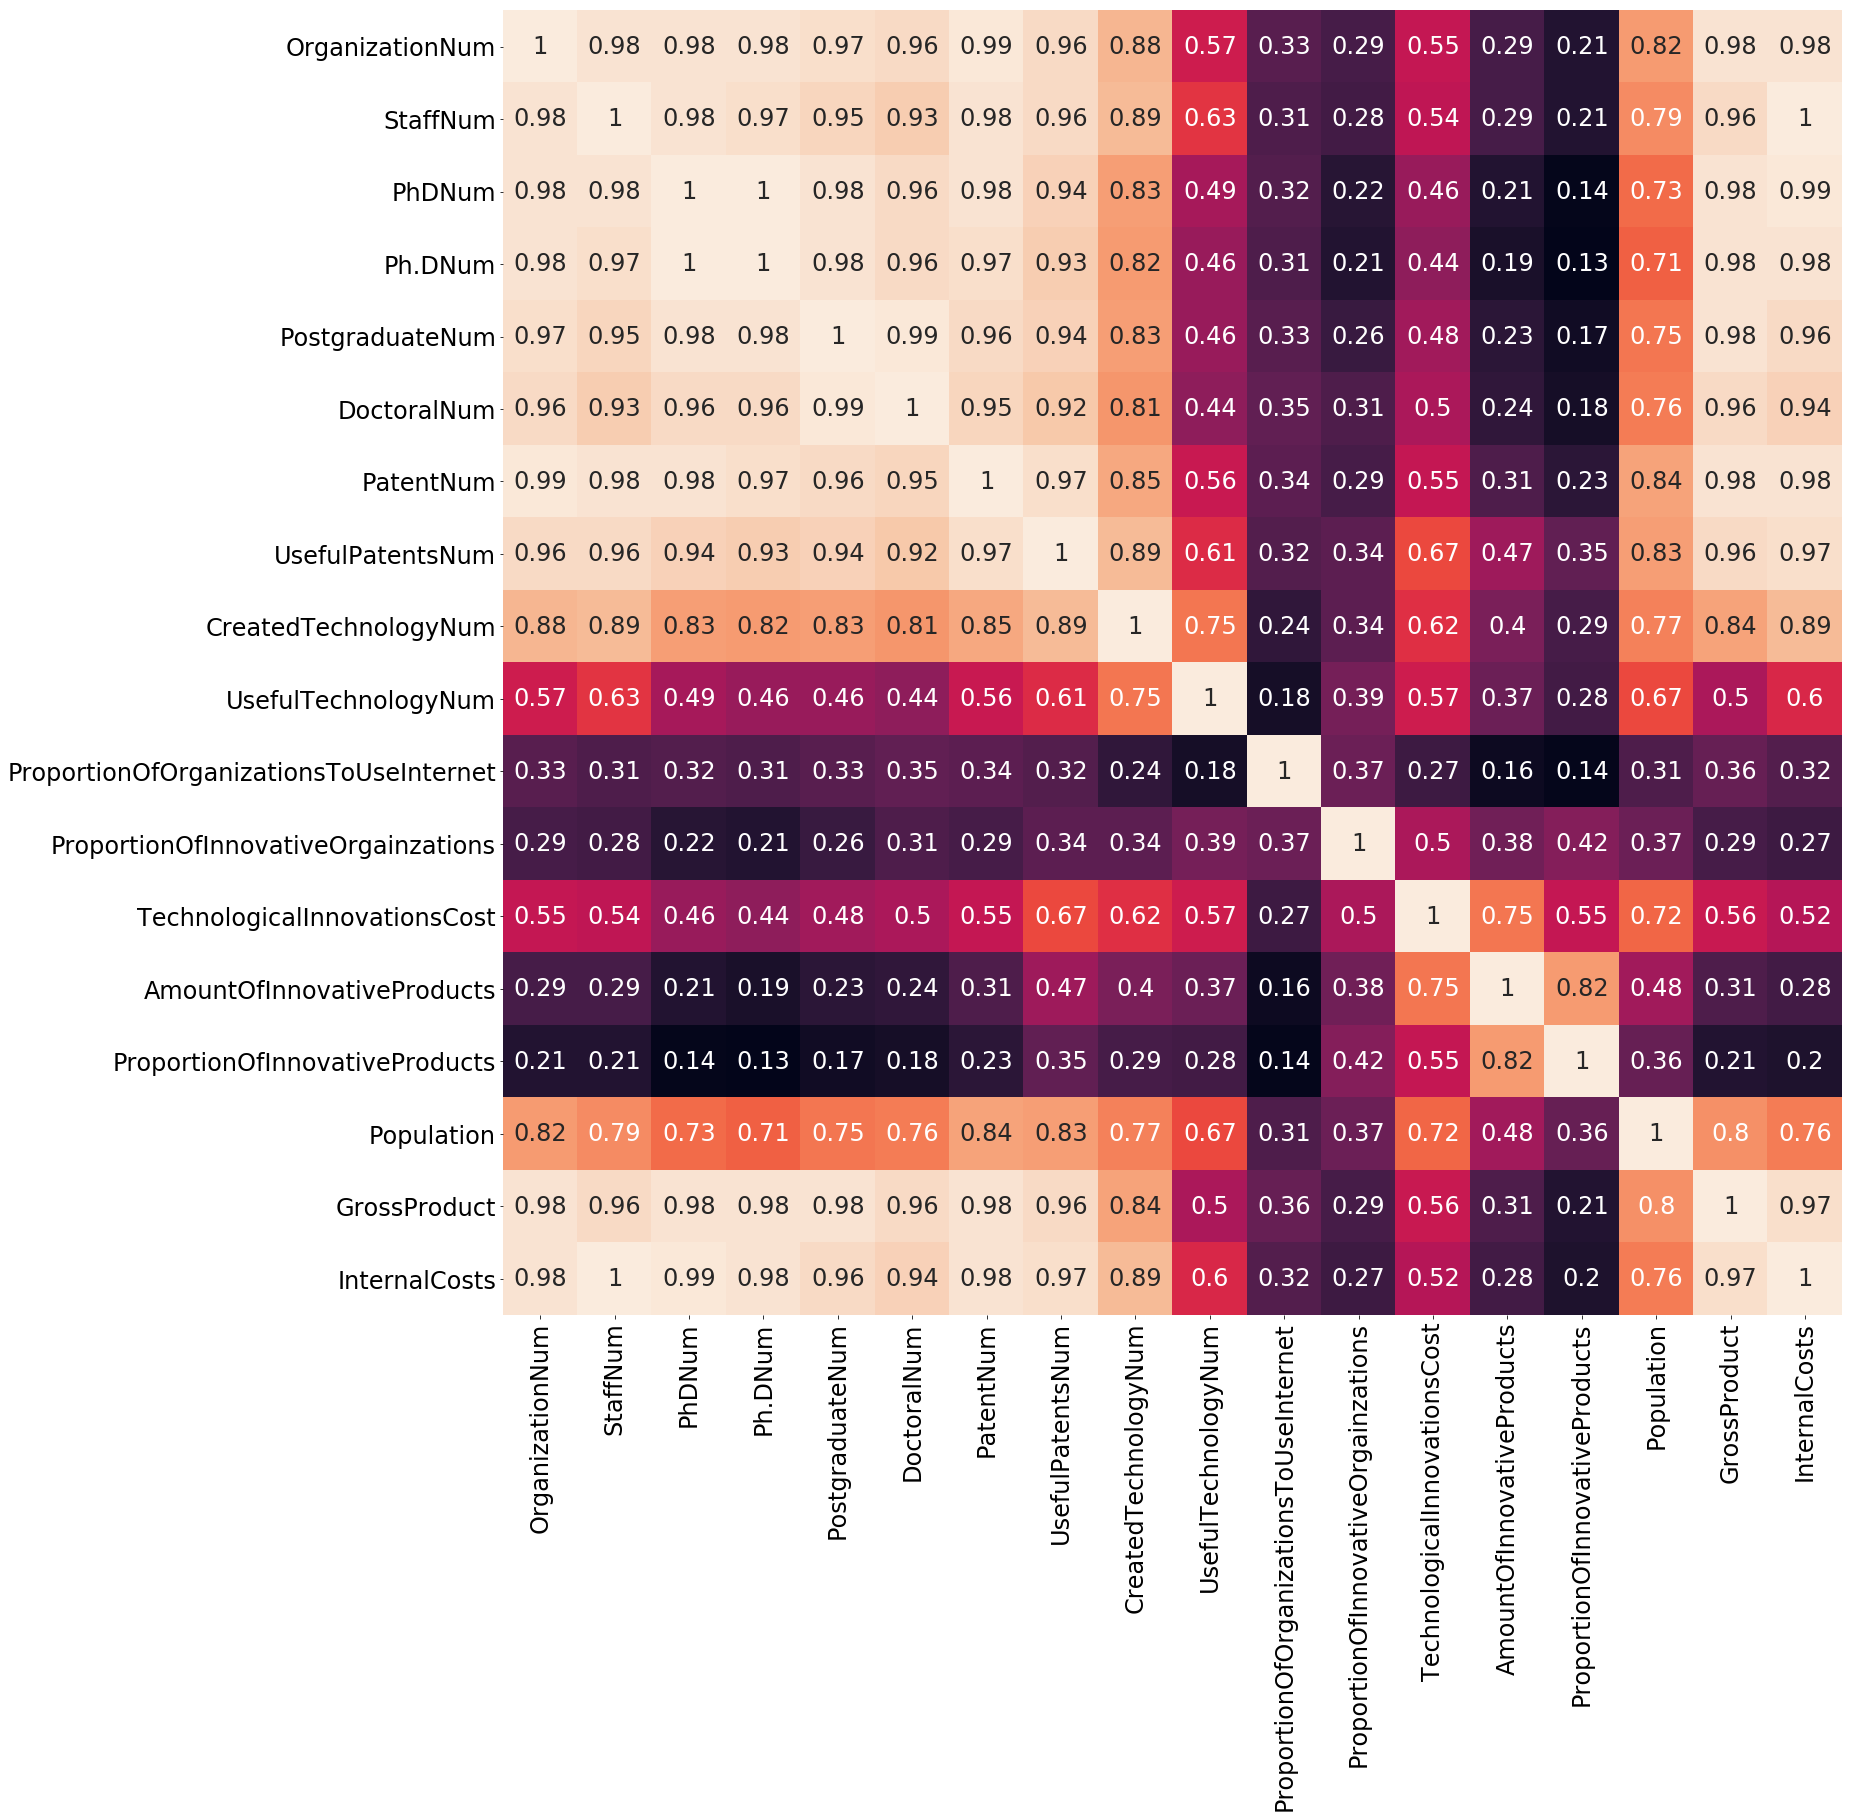

In [36]:
plt.figure(figsize=(24, 24))
heatmap_fig = sns.heatmap(df0_scaled.corr().round(2), annot=True, annot_kws={"size":24}, cbar=False)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

In [37]:
merged_df_list[0].set_value(36, 'PostgraduateNum', 0)


Region  OrganizationNum  StaffNum  PhDNum  Ph.DNum  \
0           Белгородская область               23       559      92       15   
1               Брянская область               20      1136      44        8   
2           Владимирская область               35      2337     297       52   
3            Воронежская область               57      6114     783      119   
4             Ивановская область               30       435     196       48   
5              Калужская область               33      3495     787      205   
6            Костромская область                8        71      18        2   
7                Курская область               23       713      66       24   
8               Липецкая область               10        49      43       27   
9             Московская область              206     30899    6456     1659   
10             Орловская область               18       330      87       19   
11             Рязанская область               16      1052     132       23   
12            Смоленская область               14       299      51        8   
13            Тамбовская область               23       828     145       24   
14              Тверская область               42      2583     423       54   
15              Тульская область               22      3698     154       43   
16           Ярославская область               26      1769     291       61   
17                        Москва              787     93778   32695    11234   
18            Республика Карелия               16       216     278       70   
19               Республика Коми               19       745     335       82   
20         Архангельская область               24       723     104        0   
21     Ненецкий автономный округ                2        12       1        0   
22           Вологодская область               15       215      46        6   
23       Калинингpадская область               14       638     105       14   
24         Ленинградская область               17      1804     501      103   
25            Мурманская область               28       526     384      107   
26          Новгородская область               10       471      19        1   
27             Псковская область               10       111      30        3   
28             Республика Адыгея                3        49      28       14   
29           Республика Калмыкия                8        67      66       11   
..                           ...              ...       ...     ...      ...   
47          Оренбургская область               14       335     139       37   
48            Пензенская область               24      2817      95       15   
49             Самарская область               51      6335     458      106   
50           Саратовская область               57      2500     560      164   
51           Ульяновская область               22      2190     196       49   
52            Курганская область               15       395      71       31   
53          Свердловская область              117      7957    1764      535   
54             Тюменская область               33      1577     240       71   
55           Челябинская область               40      6834     623      138   
56              Республика Алтай                6        39      29        3   
57            Республика Бурятия               17       409     386      102   
58               Республика Тыва                6        87      59       11   
59            Республика Хакасия                3       103      92       22   
60                Алтайский край               35       900     237       59   
61            Забайкальский край               10       234       0        0   
62             Красноярский край               60      2932     566      195   
63             Иркутская область               35      1561     981      345   
64           Кемеровская область               29       567     172       54   
65         Новосибирская о

In [38]:
merged_df_list[0].set_value(36, 'PostgraduateNum', 0)
merged_df_list[0].set_value(41, 'GrossProduct', 167139716)
merged_df_dict = {}
for i in range(0, 10):
    prepared_df = merged_df_list[i].applymap(str_to_num)
    prepared_df = prepared_df.applymap(lambda x: 0.0 if x in ['-', '0)'] else x)
    merged_df_dict[i + 2005] = prepared_df   

In [39]:
#merged_df_dict
hier_concatenated_df = pd.concat(merged_df_dict, names=['Year', 'Region'])

In [40]:
hier_concatenated_df.shape

(770, 19)

In [41]:
hier_concatenated_df = hier_concatenated_df.applymap(str_to_num)
hier_concatenated_df = hier_concatenated_df.applymap(lambda x: 0.0 if x in ['-', '0)'] else x)

In [42]:
for column_name in hier_concatenated_df.columns:
    print(column_name)
    print(hier_concatenated_df.loc[hier_concatenated_df[column_name].astype(str) == '1.671.397.1.6'])

Region
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnologyNum, ProportionOfOrganizationsToUseInternet, ProportionOfInnovativeOrgainzations, TechnologicalInnovationsCost, AmountOfInnovativeProducts, ProportionOfInnovativeProducts, Population, GrossProduct, InternalCosts]
Index: []
OrganizationNum
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnologyNum, ProportionOfOrganizationsToUseInternet, ProportionOfInnovativeOrgainzations, TechnologicalInnovationsCost, AmountOfInnovativeProducts, ProportionOfInnovativeProducts, Population, GrossProduct, InternalCosts]
Index: []
StaffNum
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnol

In [43]:
print(hier_concatenated_df.loc[(2014, 41), 'GrossProduct'])

1.671.397.1.6


In [44]:
hier_concatenated_df.loc[(2014, 41), 'GrossProduct'] = 167139716

In [45]:
print(hier_concatenated_df.columns)

Index(['Region', 'OrganizationNum', 'StaffNum', 'PhDNum', 'Ph.DNum',
       'PostgraduateNum', 'DoctoralNum', 'PatentNum', 'UsefulPatentsNum',
       'CreatedTechnologyNum', 'UsefulTechnologyNum',
       'ProportionOfOrganizationsToUseInternet',
       'ProportionOfInnovativeOrgainzations', 'TechnologicalInnovationsCost',
       'AmountOfInnovativeProducts', 'ProportionOfInnovativeProducts',
       'Population', 'GrossProduct', 'InternalCosts'],
      dtype='object')


In [46]:
droped_regions_hier_concatenated_df = hier_concatenated_df[hier_concatenated_df.columns.drop('Region')]

In [47]:
droped_regions_hier_concatenated_df.head()

OrganizationNum  StaffNum  PhDNum  Ph.DNum  PostgraduateNum  \
Year Region                                                                
2005 0                    23       559      92       15             1003   
     1                    20      1136      44        8              472   
     2                    35      2337     297       52              606   
     3                    57      6114     783      119             2347   
     4                    30       435     196       48              919   

             DoctoralNum  PatentNum  UsefulPatentsNum  CreatedTechnologyNum  \
Year Region                                                                   
2005 0              36.0       77.0                45                    16   
     1              20.0       38.0                10                     0   
     2              16.0      118.0                46                    11   
     3              65.0      449.0                70                    11   
     4              44.0       98.0                35                     0   

             UsefulTechnologyNum  ProportionOfOrganizationsToUseInternet  \
Year Region                                                                
2005 0                       550                                    48.0   
     1                       690                                    40.8   
     2                      1653                                    48.5   
     3                      1805                                    56.9   
     4                       432                                    38.3   

            ProportionOfInnovativeOrgainzations TechnologicalInnovationsCost  \
Year Region                                                                    
2005 0                                      8.7                       1204.6   
     1                                      6.2                        440.0   
     2                                     10.7                        673.5   
     3                                     12.2                       1733.9   
     4                                      4.5                        494.2   

            AmountOfInnovativeProducts ProportionOfInnovativeProducts  \
Year Region                                                             
2005 0                          2206.9                            1.5   
     1                          4461.4                           11.3   
     2                          3390.6                            4.0   
     3                          6407.7                            7.3   
     4                           452.3                            1.3   

             Population GrossProduct InternalCosts  
Year Region                                         
2005 0             1511       144988           245  
     1             1331      66692.3         249.7  
     2             1473      86926.8        1463.1  
     3             2314       133587        2140.4  
     4             1100      44415.4         228.8

In [48]:
for column_name in hier_concatenated_df.columns:
    print(column_name)
    print(hier_concatenated_df.loc[hier_concatenated_df[column_name].astype(str) == '395.700.1'])

Region
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnologyNum, ProportionOfOrganizationsToUseInternet, ProportionOfInnovativeOrgainzations, TechnologicalInnovationsCost, AmountOfInnovativeProducts, ProportionOfInnovativeProducts, Population, GrossProduct, InternalCosts]
Index: []
OrganizationNum
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnologyNum, ProportionOfOrganizationsToUseInternet, ProportionOfInnovativeOrgainzations, TechnologicalInnovationsCost, AmountOfInnovativeProducts, ProportionOfInnovativeProducts, Population, GrossProduct, InternalCosts]
Index: []
StaffNum
Empty DataFrame
Columns: [Region, OrganizationNum, StaffNum, PhDNum, Ph.DNum, PostgraduateNum, DoctoralNum, PatentNum, UsefulPatentsNum, CreatedTechnologyNum, UsefulTechnol

In [49]:
hier_concatenated_df.loc[(2014, 8), 'GrossProduct'] = 3957001

In [50]:
droped_regions_hier_concatenated_df = hier_concatenated_df[hier_concatenated_df.columns.drop('Region')]

In [51]:
scaled_with_dropped_regions_hier_concantenated_df = pd.DataFrame(
        scaler.fit_transform(droped_regions_hier_concatenated_df),
        columns=droped_regions_hier_concatenated_df.columns
    )

In [52]:
prepared_df_values = scaled_with_dropped_regions_hier_concantenated_df.values
bandwidth = cluster.estimate_bandwidth(prepared_df_values, quantile=0.1, n_samples=prepared_df_values.shape[0])
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(prepared_df_values)
labels = ms.labels_
cluster_centres = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


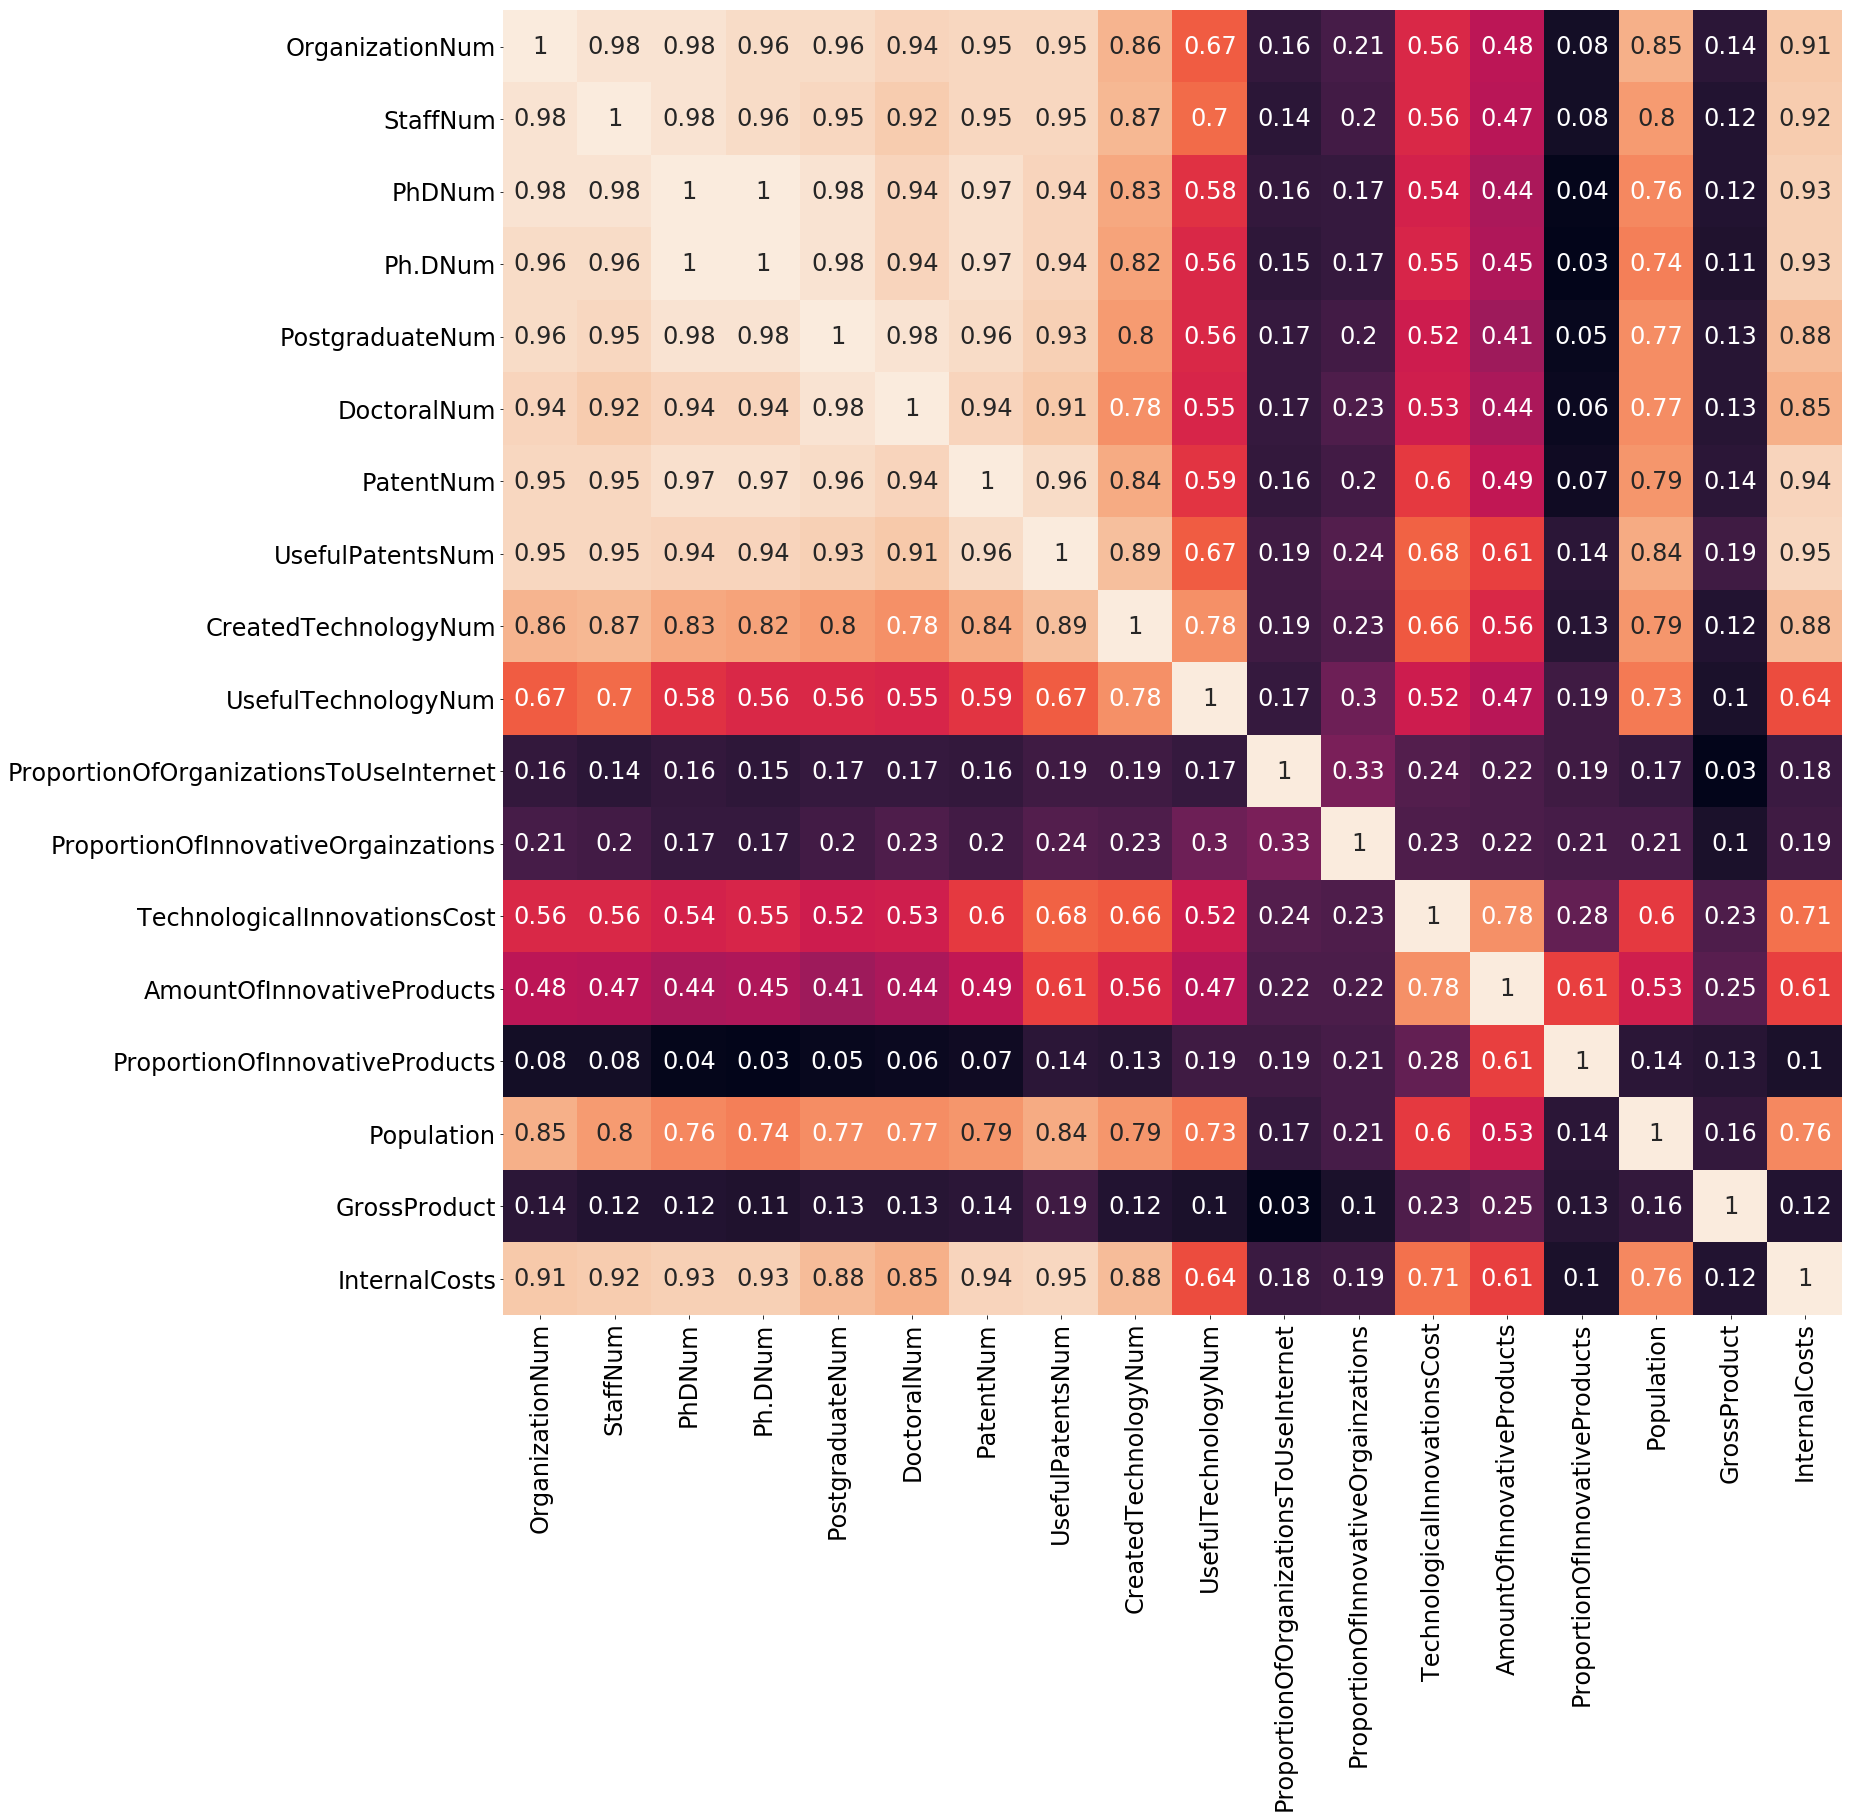

In [53]:
plt.figure(figsize=(24, 24))
heatmap_fig = sns.heatmap(scaled_with_dropped_regions_hier_concantenated_df.corr().round(2), annot=True, annot_kws={"size":24}, cbar=False)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

In [54]:
cross_corr_matrix = scaled_with_dropped_regions_hier_concantenated_df.corr()

In [55]:
print(cross_corr_matrix)

                                        OrganizationNum  StaffNum    PhDNum  \
OrganizationNum                                1.000000  0.984524  0.976714   
StaffNum                                       0.984524  1.000000  0.976131   
PhDNum                                         0.976714  0.976131  1.000000   
Ph.DNum                                        0.963366  0.961487  0.996944   
PostgraduateNum                                0.960735  0.947532  0.976334   
DoctoralNum                                    0.942178  0.917075  0.944895   
PatentNum                                      0.952180  0.947252  0.968799   
UsefulPatentsNum                               0.953175  0.945972  0.942370   
CreatedTechnologyNum                           0.864473  0.871643  0.827853   
UsefulTechnologyNum                            0.673509  0.696596  0.580932   
ProportionOfOrganizationsToUseInternet         0.155486  0.142363  0.155502   
ProportionOfInnovativeOrgainzations            0.205

In [56]:
print(cross_corr_matrix['ProportionOfOrganizationsToUseInternet'])

OrganizationNum                           0.155486
StaffNum                                  0.142363
PhDNum                                    0.155502
Ph.DNum                                   0.153031
PostgraduateNum                           0.165354
DoctoralNum                               0.173614
PatentNum                                 0.160220
UsefulPatentsNum                          0.186983
CreatedTechnologyNum                      0.187036
UsefulTechnologyNum                       0.168732
ProportionOfOrganizationsToUseInternet    1.000000
ProportionOfInnovativeOrgainzations       0.328612
TechnologicalInnovationsCost              0.236212
AmountOfInnovativeProducts                0.222080
ProportionOfInnovativeProducts            0.190512
Population                                0.173437
GrossProduct                              0.028855
InternalCosts                             0.178800
Name: ProportionOfOrganizationsToUseInternet, dtype: float64


In [57]:
print(cross_corr_matrix['UsefulTechnologyNum'])

OrganizationNum                           0.673509
StaffNum                                  0.696596
PhDNum                                    0.580932
Ph.DNum                                   0.556491
PostgraduateNum                           0.563280
DoctoralNum                               0.549739
PatentNum                                 0.590269
UsefulPatentsNum                          0.672532
CreatedTechnologyNum                      0.775376
UsefulTechnologyNum                       1.000000
ProportionOfOrganizationsToUseInternet    0.168732
ProportionOfInnovativeOrgainzations       0.295222
TechnologicalInnovationsCost              0.524366
AmountOfInnovativeProducts                0.470333
ProportionOfInnovativeProducts            0.192778
Population                                0.726452
GrossProduct                              0.096941
InternalCosts                             0.643013
Name: UsefulTechnologyNum, dtype: float64


In [58]:
print(cross_corr_matrix['ProportionOfInnovativeOrgainzations'])

OrganizationNum                           0.205519
StaffNum                                  0.204477
PhDNum                                    0.174303
Ph.DNum                                   0.171063
PostgraduateNum                           0.200971
DoctoralNum                               0.234039
PatentNum                                 0.201951
UsefulPatentsNum                          0.239685
CreatedTechnologyNum                      0.233386
UsefulTechnologyNum                       0.295222
ProportionOfOrganizationsToUseInternet    0.328612
ProportionOfInnovativeOrgainzations       1.000000
TechnologicalInnovationsCost              0.227278
AmountOfInnovativeProducts                0.218998
ProportionOfInnovativeProducts            0.214053
Population                                0.212783
GrossProduct                              0.101727
InternalCosts                             0.190035
Name: ProportionOfInnovativeOrgainzations, dtype: float64


In [59]:
print(cross_corr_matrix['AmountOfInnovativeProducts'])

OrganizationNum                           0.483368
StaffNum                                  0.474889
PhDNum                                    0.443500
Ph.DNum                                   0.447539
PostgraduateNum                           0.414923
DoctoralNum                               0.435216
PatentNum                                 0.491648
UsefulPatentsNum                          0.612713
CreatedTechnologyNum                      0.559562
UsefulTechnologyNum                       0.470333
ProportionOfOrganizationsToUseInternet    0.222080
ProportionOfInnovativeOrgainzations       0.218998
TechnologicalInnovationsCost              0.784284
AmountOfInnovativeProducts                1.000000
ProportionOfInnovativeProducts            0.613552
Population                                0.526737
GrossProduct                              0.247785
InternalCosts                             0.612799
Name: AmountOfInnovativeProducts, dtype: float64


In [60]:
print(cross_corr_matrix['GrossProduct'])

OrganizationNum                           0.141991
StaffNum                                  0.117741
PhDNum                                    0.115632
Ph.DNum                                   0.113248
PostgraduateNum                           0.128819
DoctoralNum                               0.128727
PatentNum                                 0.138952
UsefulPatentsNum                          0.191246
CreatedTechnologyNum                      0.124972
UsefulTechnologyNum                       0.096941
ProportionOfOrganizationsToUseInternet    0.028855
ProportionOfInnovativeOrgainzations       0.101727
TechnologicalInnovationsCost              0.228327
AmountOfInnovativeProducts                0.247785
ProportionOfInnovativeProducts            0.134081
Population                                0.159439
GrossProduct                              1.000000
InternalCosts                             0.119888
Name: GrossProduct, dtype: float64


In [61]:
print(cross_corr_matrix['ProportionOfInnovativeProducts'])

OrganizationNum                           0.081915
StaffNum                                  0.084259
PhDNum                                    0.039316
Ph.DNum                                   0.032703
PostgraduateNum                           0.054343
DoctoralNum                               0.062449
PatentNum                                 0.067723
UsefulPatentsNum                          0.144953
CreatedTechnologyNum                      0.133736
UsefulTechnologyNum                       0.192778
ProportionOfOrganizationsToUseInternet    0.190512
ProportionOfInnovativeOrgainzations       0.214053
TechnologicalInnovationsCost              0.283012
AmountOfInnovativeProducts                0.613552
ProportionOfInnovativeProducts            1.000000
Population                                0.141272
GrossProduct                              0.134081
InternalCosts                             0.102089
Name: ProportionOfInnovativeProducts, dtype: float64


In [62]:
print(cross_corr_matrix['Ph.DNum'])

OrganizationNum                           0.963366
StaffNum                                  0.961487
PhDNum                                    0.996944
Ph.DNum                                   1.000000
PostgraduateNum                           0.975743
DoctoralNum                               0.944341
PatentNum                                 0.971626
UsefulPatentsNum                          0.940429
CreatedTechnologyNum                      0.820131
UsefulTechnologyNum                       0.556491
ProportionOfOrganizationsToUseInternet    0.153031
ProportionOfInnovativeOrgainzations       0.171063
TechnologicalInnovationsCost              0.548417
AmountOfInnovativeProducts                0.447539
ProportionOfInnovativeProducts            0.032703
Population                                0.735648
GrossProduct                              0.113248
InternalCosts                             0.930666
Name: Ph.DNum, dtype: float64


In [63]:
print(labels)

[0 1 0 0 1 0 1 1 0 4 2 0 1 0 1 2 0 4 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 1 2 0 0 2 1 2 0 0 2 0 1 1 2 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 2 0 0 2 1 4 0 0 2 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 3 2 0 0 2 0 4 0 0 2 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 2 0 4 0 0 2 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 4 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [64]:
len(labels)

770

In [65]:
cluster_centres

array([[  2.52838984e-02,   8.63808017e-03,   8.24432002e-03,
          5.96964381e-03,   1.76933536e-02,   2.00848056e-02,
          1.24672088e-02,   1.61797047e-02,   2.34376636e-02,
          4.87967122e-02,   7.95518031e-01,   2.50916553e-01,
          1.72189443e-02,   1.05079321e-02,   6.43312648e-02,
          9.99595709e-02,   1.51028959e-03,   5.23207795e-03],
       [  2.69598822e-02,   1.12464125e-02,   4.92650132e-03,
          3.18059111e-03,   7.79602952e-04,   0.00000000e+00,
          5.47926499e-03,   1.02346601e-02,   3.33958724e-02,
          3.17770206e-02,   9.15159513e-02,   1.26710025e-02,
          5.40925320e-03,   2.57283957e-03,   1.85588122e-03,
          8.32737398e-02,   5.28357619e-04,   4.60739181e-03],
       [  5.94098884e-02,   4.49424658e-02,   1.40308855e-02,
          9.08309962e-03,   2.88160283e-02,   4.83672212e-02,
          4.59336514e-02,   5.65504241e-02,   6.42276423e-02,
          1.68696339e-01,   7.00134544e-01,   7.47813411e-01,
      

In [66]:
len(cluster_centres)

5

In [67]:
prepared_for_supevised_df = scaled_with_dropped_regions_hier_concantenated_df.copy()

In [68]:
prepared_for_supevised_df['cluster_class'] = labels

In [69]:
prepared_for_supevised_df.head()

OrganizationNum  StaffNum    PhDNum   Ph.DNum  PostgraduateNum  \
0         0.026316  0.005776  0.002687  0.001137         0.022027   
1         0.022727  0.011738  0.001285  0.000606         0.010365   
2         0.040670  0.024147  0.008676  0.003941         0.013308   
3         0.066986  0.063172  0.022872  0.009020         0.051542   
4         0.034689  0.004495  0.005725  0.003638         0.020182   

   DoctoralNum  PatentNum  UsefulPatentsNum  CreatedTechnologyNum  \
0     0.033272   0.008543          0.014138              0.078049   
1     0.018484   0.004216          0.003142              0.000000   
2     0.014787   0.013092          0.014452              0.053659   
3     0.060074   0.049817          0.021992              0.053659   
4     0.040665   0.010873          0.010996              0.000000   

   UsefulTechnologyNum  ProportionOfOrganizationsToUseInternet  \
0             0.019758                                0.484359   
1             0.024787                                0.411705   
2             0.059381                                0.489405   
3             0.064842                                0.574168   
4             0.015519                                0.386478   

   ProportionOfInnovativeOrgainzations  TechnologicalInnovationsCost  \
0                             0.253644                      0.006787   
1                             0.180758                      0.002479   
2                             0.311953                      0.003795   
3                             0.355685                      0.009770   
4                             0.131195                      0.002785   

   AmountOfInnovativeProducts  ProportionOfInnovativeProducts  Population  \
0                    0.003214                        0.024958    0.120856   
1                    0.006497                        0.188020    0.106047   
2                    0.004937                        0.066556    0.117729   
3                    0.009331                        0.121464    0.186919   
4                    0.000659                        0.021631    0.087042   

   GrossProduct  InternalCosts  cluster_class  
0      0.000867       0.000821              0  
1      0.000399       0.000837              1  
2      0.000520       0.004906              0  
3      0.000799       0.007177              0  
4      0.000266       0.000767              1

In [70]:
prepared_for_supevised_df.shape

(770, 19)

In [71]:
def report_best_score(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [72]:
from sklearn.datasets import load_digits

In [73]:
digits = load_digits()

In [74]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [75]:
param_dist = {"max_depth": [3, 7],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [76]:
clf = RandomForestClassifier(n_estimators=20)

In [77]:
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

In [78]:
start = time()
random_search.fit(prepared_df_values, labels)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report_best_score(random_search.cv_results_)

RandomizedSearchCV took 6.57 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.938 (std: 0.047)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.931 (std: 0.045)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 9, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.931 (std: 0.038)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 7}



In [79]:
param_grid = {"max_depth": [3, 7],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

In [80]:
start = time()
grid_search.fit(prepared_df_values, labels)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report_best_score(grid_search.cv_results_)

GridSearchCV took 57.55 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.949 (std: 0.035)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.948 (std: 0.039)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.945 (std: 0.022)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10}



In [81]:
better_clf = RandomForestClassifier(n_estimators=20, bootstrap=True, criterion='entropy', max_depth=7, max_features=10, min_samples_leaf=1, min_samples_split=3)

In [82]:
better_clf.fit(prepared_df_values, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [83]:
better_clf.feature_importances_

array([ 0.01778274,  0.07338268,  0.03205563,  0.00205789,  0.00656344,
        0.00245969,  0.00777604,  0.07431573,  0.00959371,  0.08623307,
        0.29457016,  0.23625063,  0.00645551,  0.04988805,  0.05198964,
        0.01012751,  0.00470256,  0.03379532])

Feature ranking:
1. feature 10 (0.294570)
2. feature 11 (0.236251)
3. feature 9 (0.086233)
4. feature 7 (0.074316)
5. feature 1 (0.073383)
6. feature 14 (0.051990)
7. feature 13 (0.049888)
8. feature 17 (0.033795)
9. feature 2 (0.032056)
10. feature 0 (0.017783)
11. feature 15 (0.010128)
12. feature 8 (0.009594)
13. feature 6 (0.007776)
14. feature 4 (0.006563)
15. feature 12 (0.006456)
16. feature 16 (0.004703)
17. feature 5 (0.002460)
18. feature 3 (0.002058)


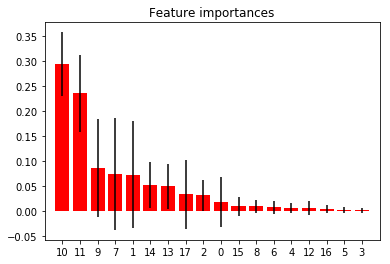

In [84]:
#importances = forest.feature_importances_
importances = better_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in better_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(prepared_df_values.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(prepared_df_values.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(prepared_df_values.shape[1]), indices)
plt.xlim([-1, prepared_df_values.shape[1]])
plt.show()


In [85]:
features = scaled_with_dropped_regions_hier_concantenated_df.columns

In [86]:
for i in indices:
    print(features[i])

ProportionOfOrganizationsToUseInternet
ProportionOfInnovativeOrgainzations
UsefulTechnologyNum
UsefulPatentsNum
StaffNum
ProportionOfInnovativeProducts
AmountOfInnovativeProducts
InternalCosts
PhDNum
OrganizationNum
Population
CreatedTechnologyNum
PatentNum
PostgraduateNum
TechnologicalInnovationsCost
GrossProduct
DoctoralNum
Ph.DNum


In [87]:
clipped_scaled_with_dropped_regions_hier_concantenated_df = scaled_with_dropped_regions_hier_concantenated_df[['ProportionOfOrganizationsToUseInternet', 'UsefulTechnologyNum', 'ProportionOfInnovativeOrgainzations', 'AmountOfInnovativeProducts', 'GrossProduct', 'ProportionOfInnovativeProducts', 'Ph.DNum']]

In [88]:
print(clipped_scaled_with_dropped_regions_hier_concantenated_df.columns)

Index(['ProportionOfOrganizationsToUseInternet', 'UsefulTechnologyNum',
       'ProportionOfInnovativeOrgainzations', 'AmountOfInnovativeProducts',
       'GrossProduct', 'ProportionOfInnovativeProducts', 'Ph.DNum'],
      dtype='object')


In [89]:
print(len(clipped_scaled_with_dropped_regions_hier_concantenated_df.columns))

7


In [90]:
clipped_prepared_df_values = clipped_scaled_with_dropped_regions_hier_concantenated_df.values
bandwidth_for_clipped = cluster.estimate_bandwidth(clipped_prepared_df_values, quantile=0.1, n_samples=clipped_scaled_with_dropped_regions_hier_concantenated_df.shape[0])
ms_1 = cluster.MeanShift(bandwidth=bandwidth_for_clipped, bin_seeding=True)
ms_1.fit(clipped_prepared_df_values)
labels_for_clipped = ms_1.labels_
cluster_centres_for_clipped = ms_1.cluster_centers_
labels_unique_for_clipped = np.unique(labels_for_clipped)
n_clusters_for_clipped_ = len(labels_unique_for_clipped)
print("number of estimated clusters : %d" % n_clusters_for_clipped_)

number of estimated clusters : 23


In [91]:
clf_1 = RandomForestClassifier(n_estimators=20)

In [92]:
param_dist_for_clipped = {"max_depth": [3, 7],
              "max_features": sp_randint(1, 7),
              "min_samples_split": sp_randint(2, 7),
              "min_samples_leaf": sp_randint(1, 7),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [93]:
n_iter_search = 20
random_search_1 = RandomizedSearchCV(clf_1, param_distributions=param_dist_for_clipped,
                                   n_iter=n_iter_search)

In [94]:
start = time()
random_search_1.fit(clipped_prepared_df_values, labels_for_clipped)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report_best_score(random_search_1.cv_results_)

RandomizedSearchCV took 5.69 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.894 (std: 0.039)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 4}

Model with rank: 2
Mean validation score: 0.891 (std: 0.041)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.890 (std: 0.070)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}



In [95]:
better_clf_for_clipped = RandomForestClassifier(n_estimators=20, bootstrap=True, criterion='gini', max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=5)

In [96]:
better_clf_for_clipped.fit(clipped_prepared_df_values, labels_for_clipped)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [97]:
better_clf_for_clipped.feature_importances_

array([ 0.29221052,  0.16108598,  0.18209454,  0.10321612,  0.04807626,
        0.17936224,  0.03395433])

Feature ranking:
1. feature 0 (0.292211)
2. feature 2 (0.182095)
3. feature 5 (0.179362)
4. feature 1 (0.161086)
5. feature 3 (0.103216)
6. feature 4 (0.048076)
7. feature 6 (0.033954)


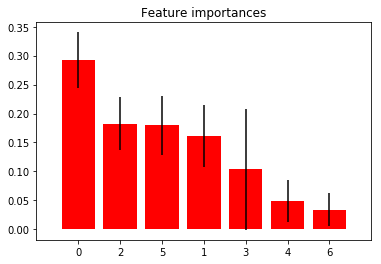

In [98]:
importances_for_clipped = better_clf_for_clipped.feature_importances_
std = np.std([tree.feature_importances_ for tree in better_clf_for_clipped.estimators_],
             axis=0)
indices_for_clipped = np.argsort(importances_for_clipped)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(clipped_prepared_df_values.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_for_clipped[f], importances_for_clipped[indices_for_clipped[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(clipped_prepared_df_values.shape[1]), importances_for_clipped[indices_for_clipped],
       color="r", yerr=std[indices_for_clipped], align="center")
plt.xticks(range(clipped_prepared_df_values.shape[1]), indices_for_clipped)
plt.xlim([-1, clipped_prepared_df_values.shape[1]])
plt.show()

In [99]:
features_for_clipped = clipped_scaled_with_dropped_regions_hier_concantenated_df.columns

In [100]:
for i in indices_for_clipped:
    print(features_for_clipped[i])

ProportionOfOrganizationsToUseInternet
ProportionOfInnovativeOrgainzations
ProportionOfInnovativeProducts
UsefulTechnologyNum
AmountOfInnovativeProducts
GrossProduct
Ph.DNum


In [101]:
print(features_for_clipped)

Index(['ProportionOfOrganizationsToUseInternet', 'UsefulTechnologyNum',
       'ProportionOfInnovativeOrgainzations', 'AmountOfInnovativeProducts',
       'GrossProduct', 'ProportionOfInnovativeProducts', 'Ph.DNum'],
      dtype='object')


In [102]:
work_df = clipped_scaled_with_dropped_regions_hier_concantenated_df

In [103]:
print(work_df['ProportionOfOrganizationsToUseInternet'].min(), work_df['ProportionOfOrganizationsToUseInternet'].max())

0.0 1.0


In [104]:
print(work_df['ProportionOfInnovativeOrgainzations'].min(), work_df['ProportionOfInnovativeOrgainzations'].max())

0.0 1.0


In [105]:
y_mean_shift = ms_1.predict(clipped_prepared_df_values)

In [106]:
print(y_mean_shift.shape)

(770,)


In [107]:
cluster_centres_for_clipped = ms_1.cluster_centers_

In [108]:
print(cluster_centres_for_clipped.shape)

(23, 7)


In [109]:
print(cluster_centres.shape)

(5, 18)


In [110]:
print(ms.cluster_all)

True


In [111]:
print(ms.cluster_centers_)

[[  2.52838984e-02   8.63808017e-03   8.24432002e-03   5.96964381e-03
    1.76933536e-02   2.00848056e-02   1.24672088e-02   1.61797047e-02
    2.34376636e-02   4.87967122e-02   7.95518031e-01   2.50916553e-01
    1.72189443e-02   1.05079321e-02   6.43312648e-02   9.99595709e-02
    1.51028959e-03   5.23207795e-03]
 [  2.69598822e-02   1.12464125e-02   4.92650132e-03   3.18059111e-03
    7.79602952e-04   0.00000000e+00   5.47926499e-03   1.02346601e-02
    3.33958724e-02   3.17770206e-02   9.15159513e-02   1.26710025e-02
    5.40925320e-03   2.57283957e-03   1.85588122e-03   8.32737398e-02
    5.28357619e-04   4.60739181e-03]
 [  5.94098884e-02   4.49424658e-02   1.40308855e-02   9.08309962e-03
    2.88160283e-02   4.83672212e-02   4.59336514e-02   5.65504241e-02
    6.42276423e-02   1.68696339e-01   7.00134544e-01   7.47813411e-01
    5.10139035e-02   7.28840319e-02   1.86356073e-01   2.19223913e-01
    2.95077343e-03   1.95605573e-02]
 [  2.15311005e-02   3.42518831e-03   2.93567798e

In [112]:
#print(ms.labels_)

In [113]:
print(ms.labels_.shape)

(770,)


In [114]:
cmap = plt.cm.tab20
X = prepared_df_values
cluster_labels = ms.labels_

In [115]:
import clusters_drawer

In [116]:
importlib.reload(clusters_drawer)

<module 'clusters_drawer' from '/home/uldo/work/rank/hier-clustering/Task_1/clusters_drawer.py'>

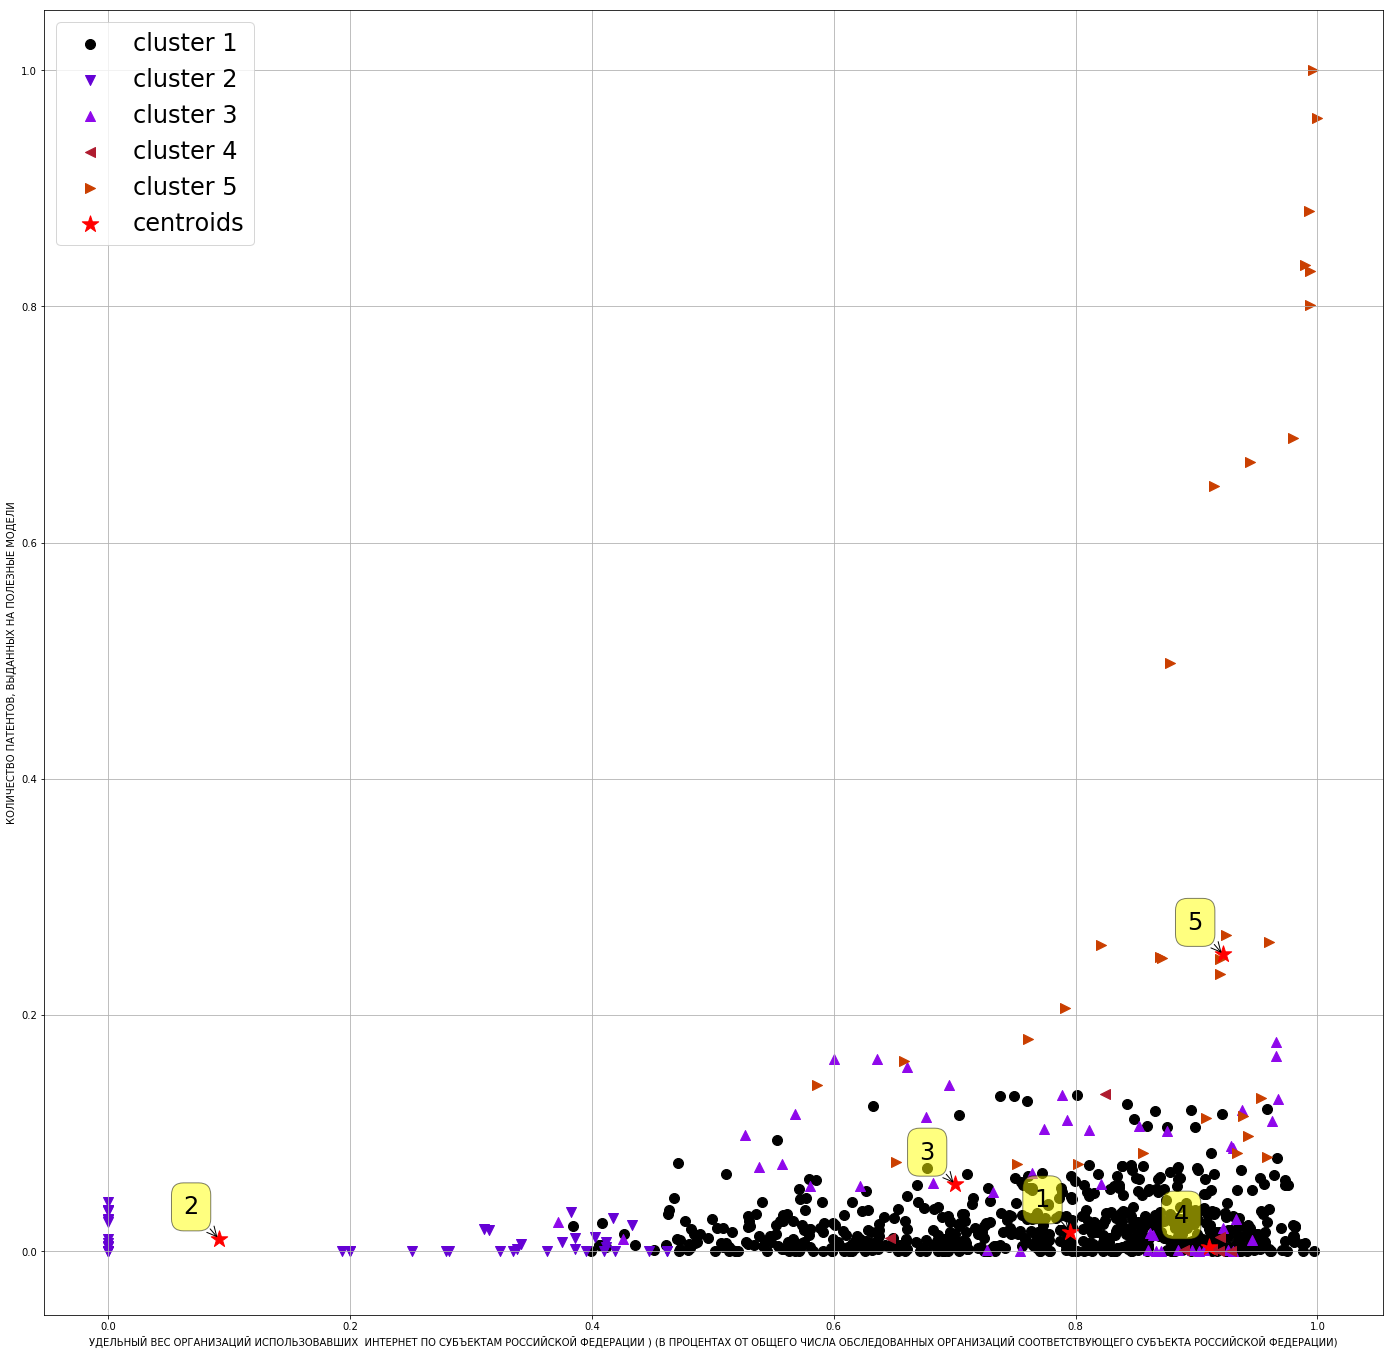

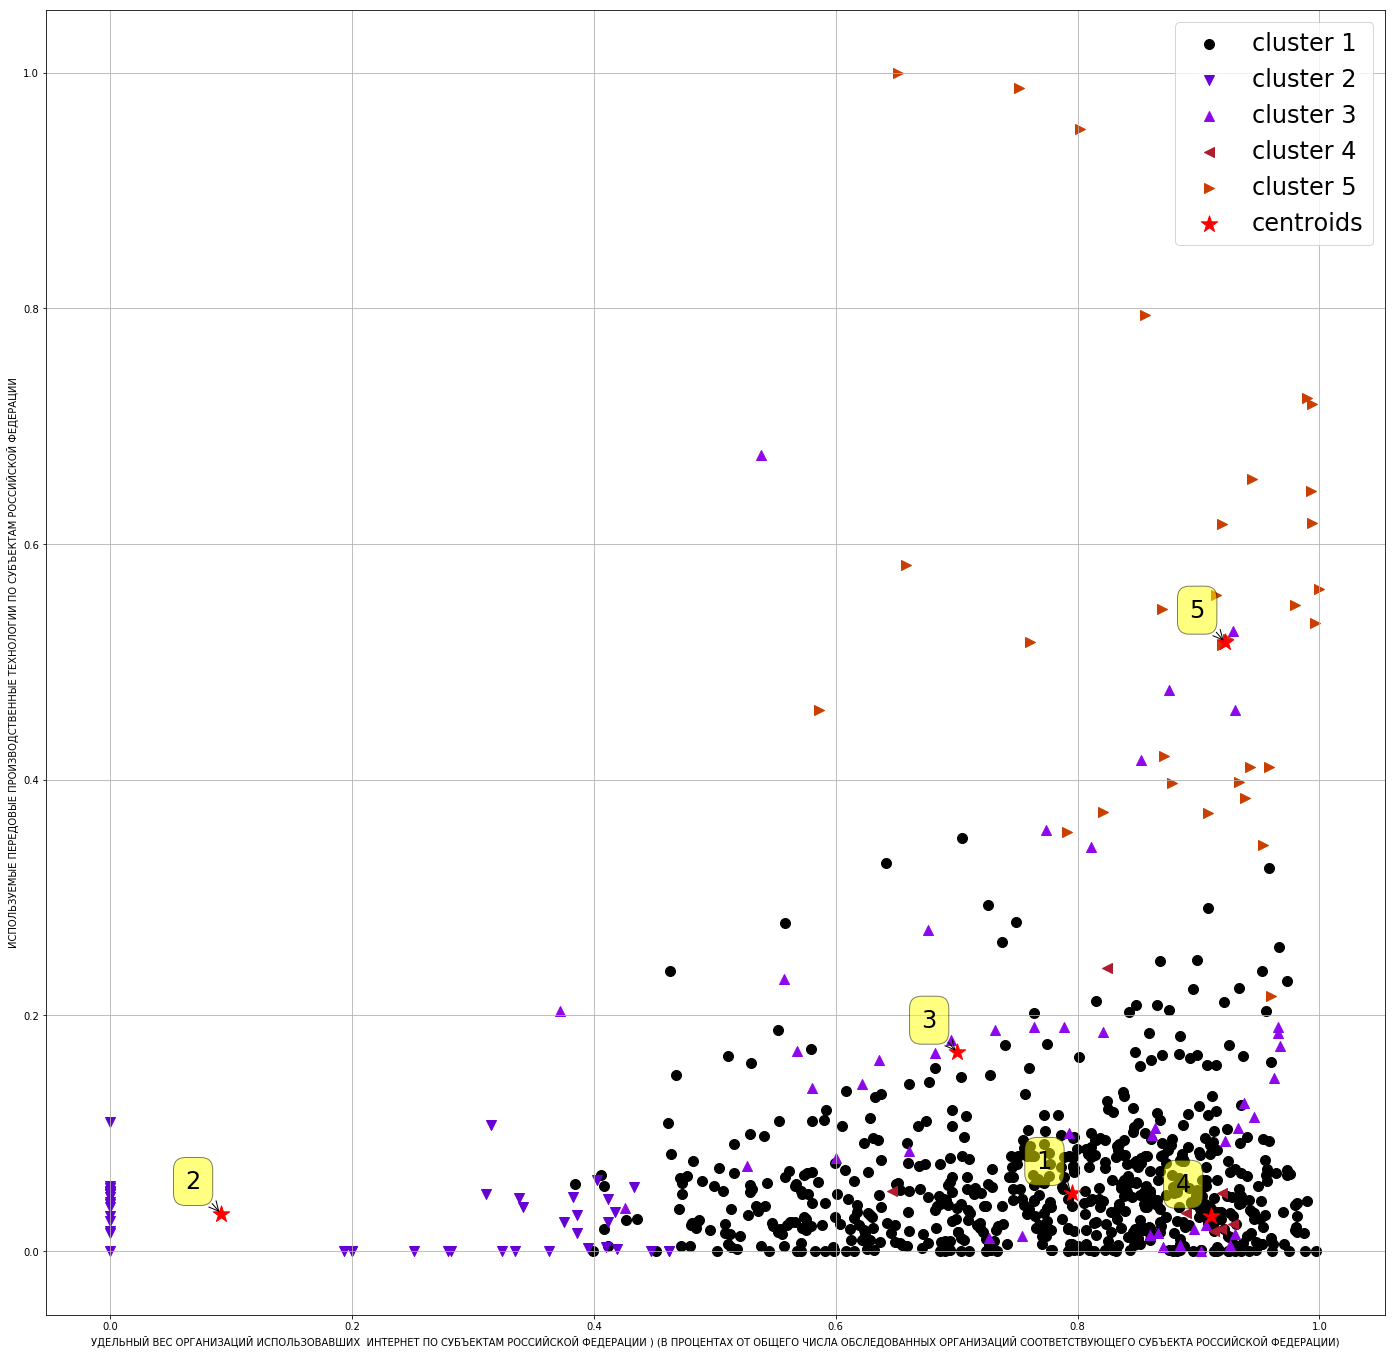

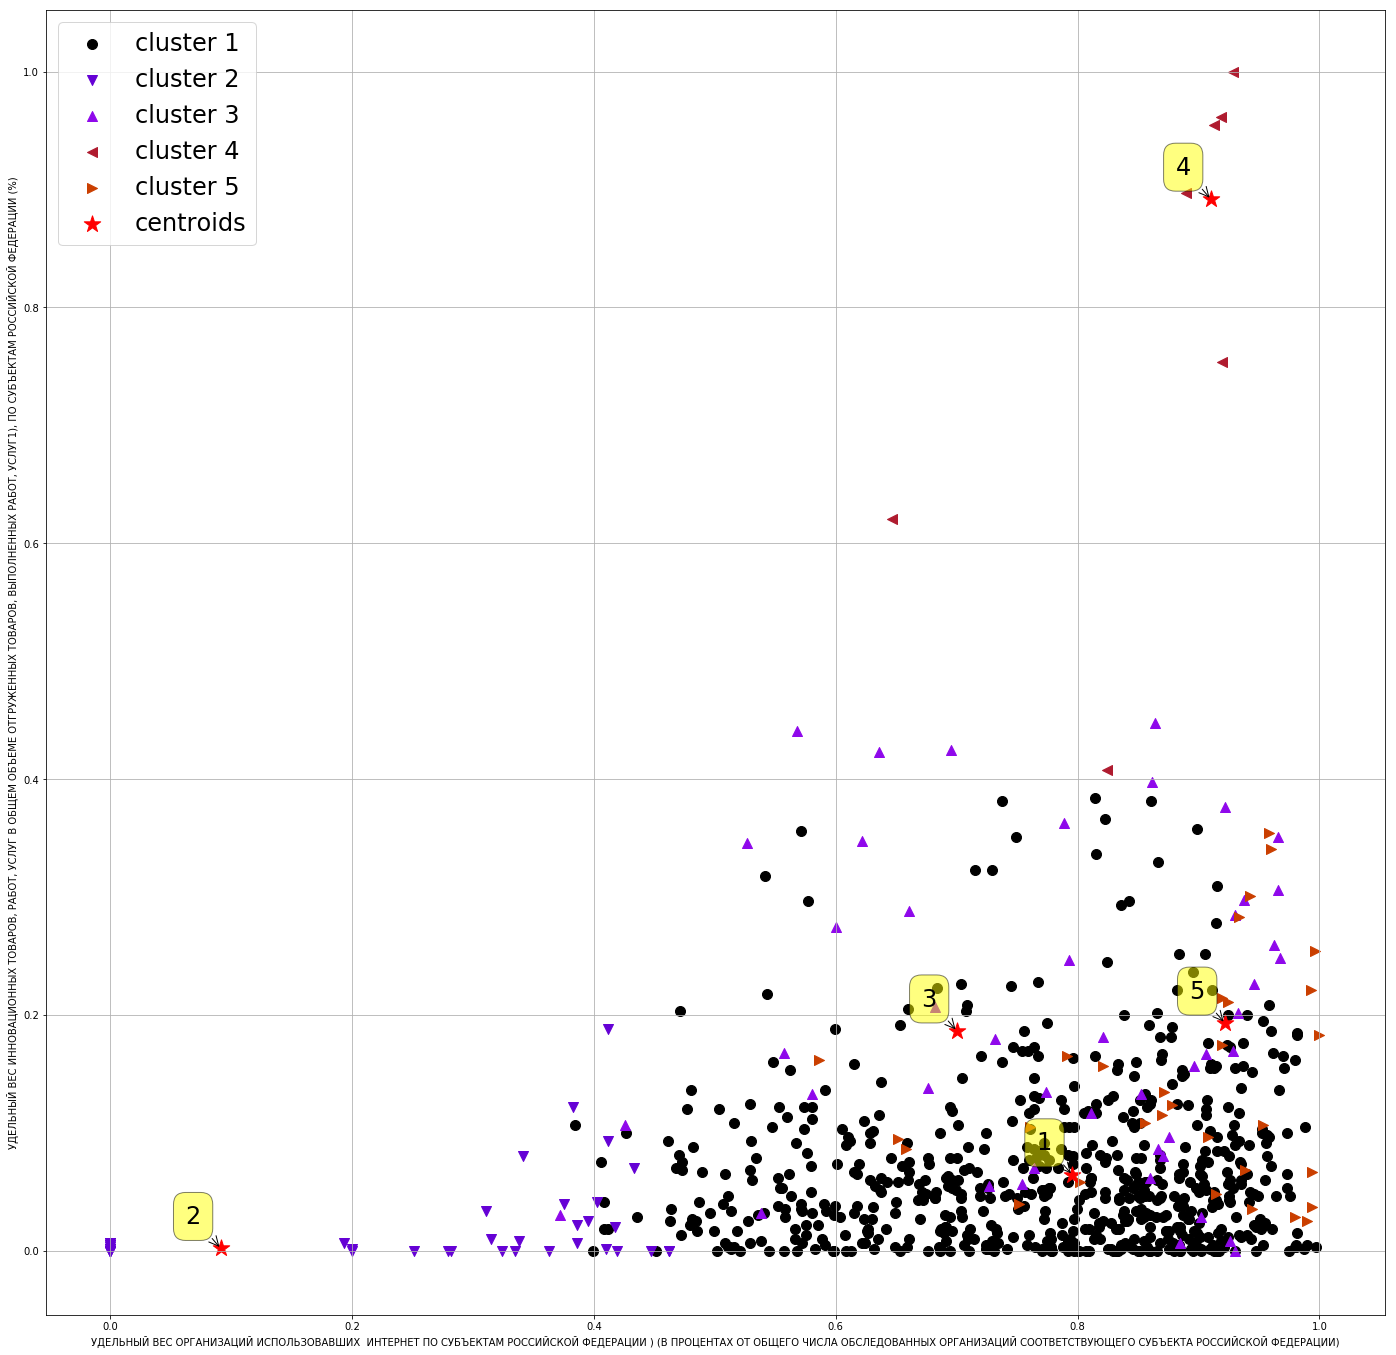

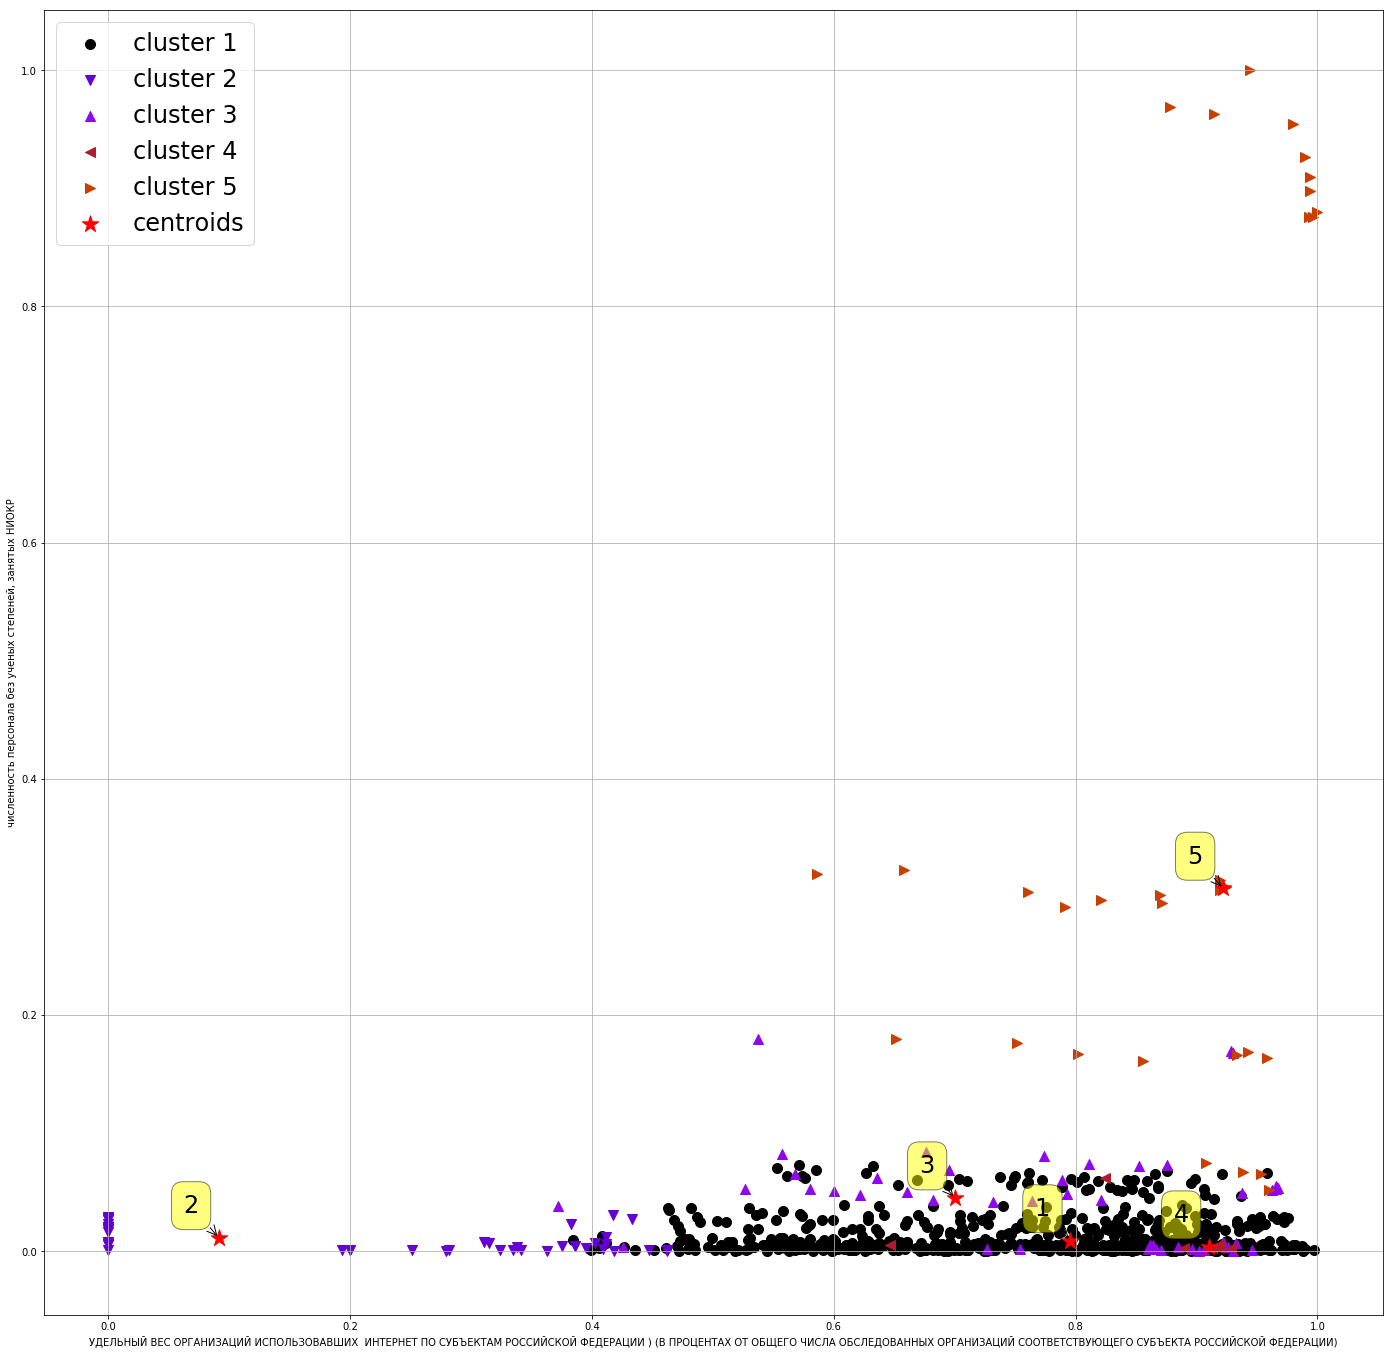

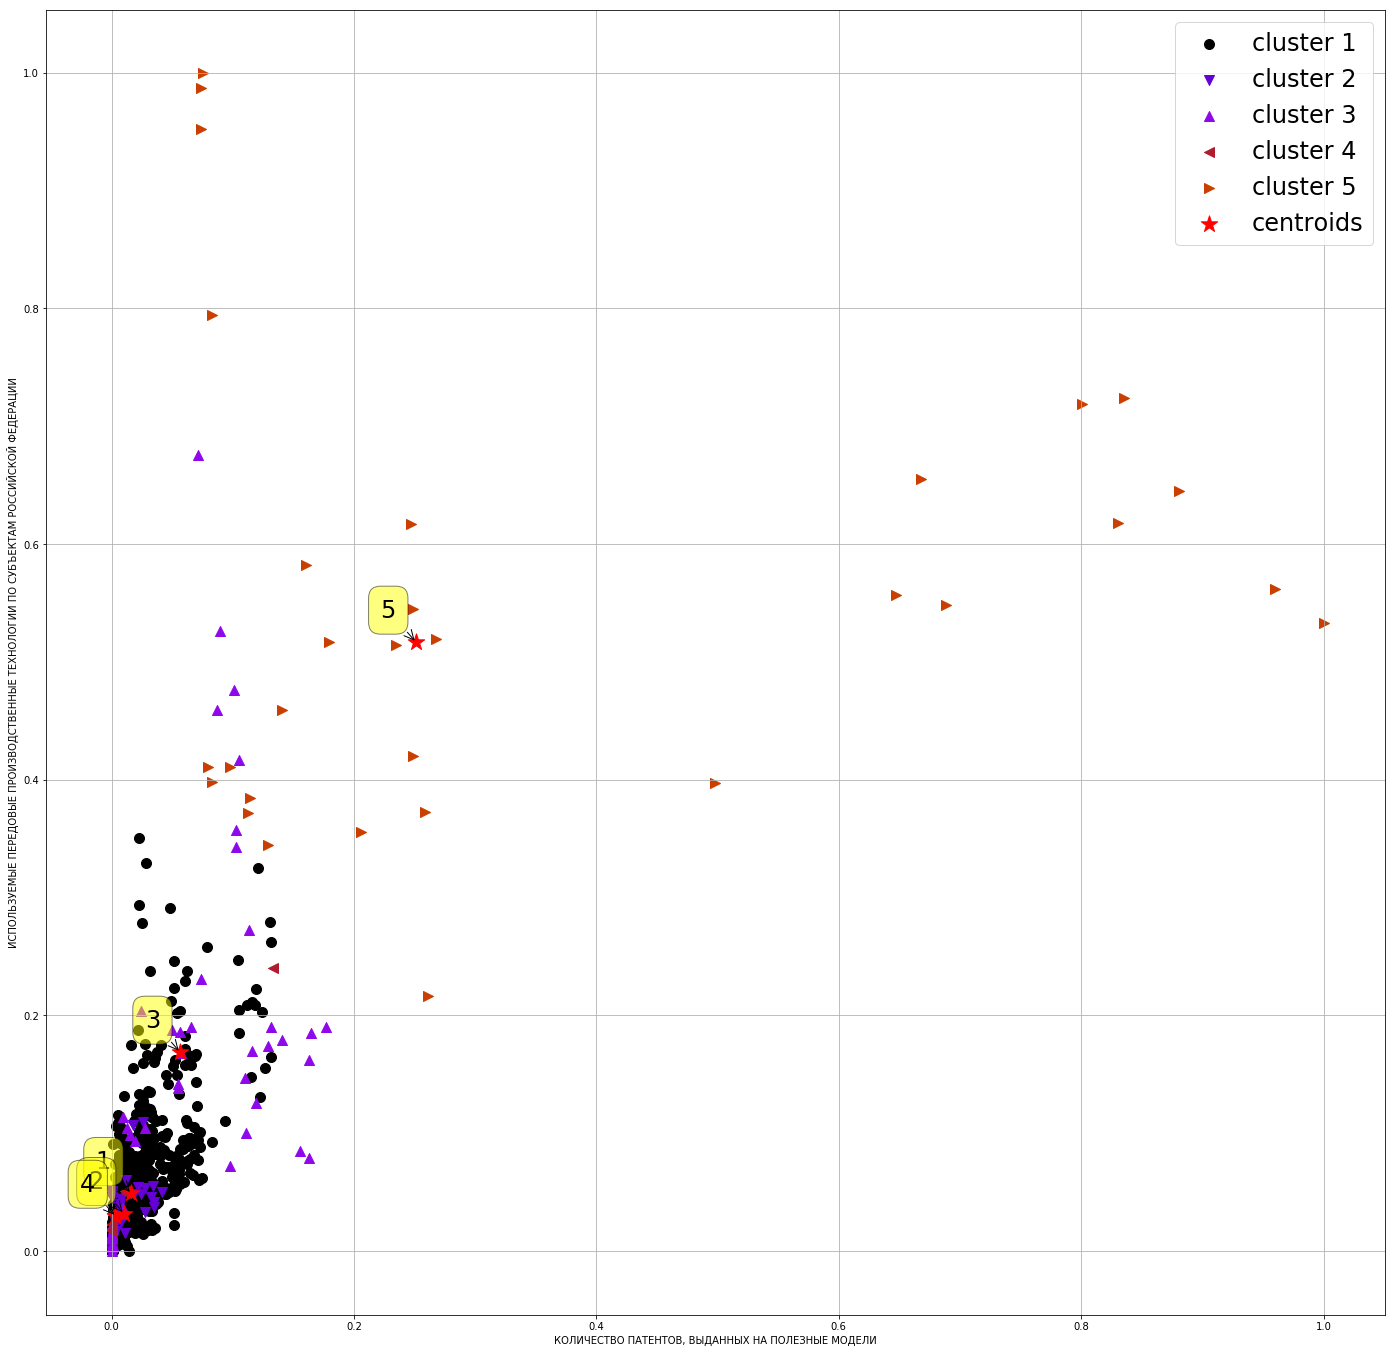

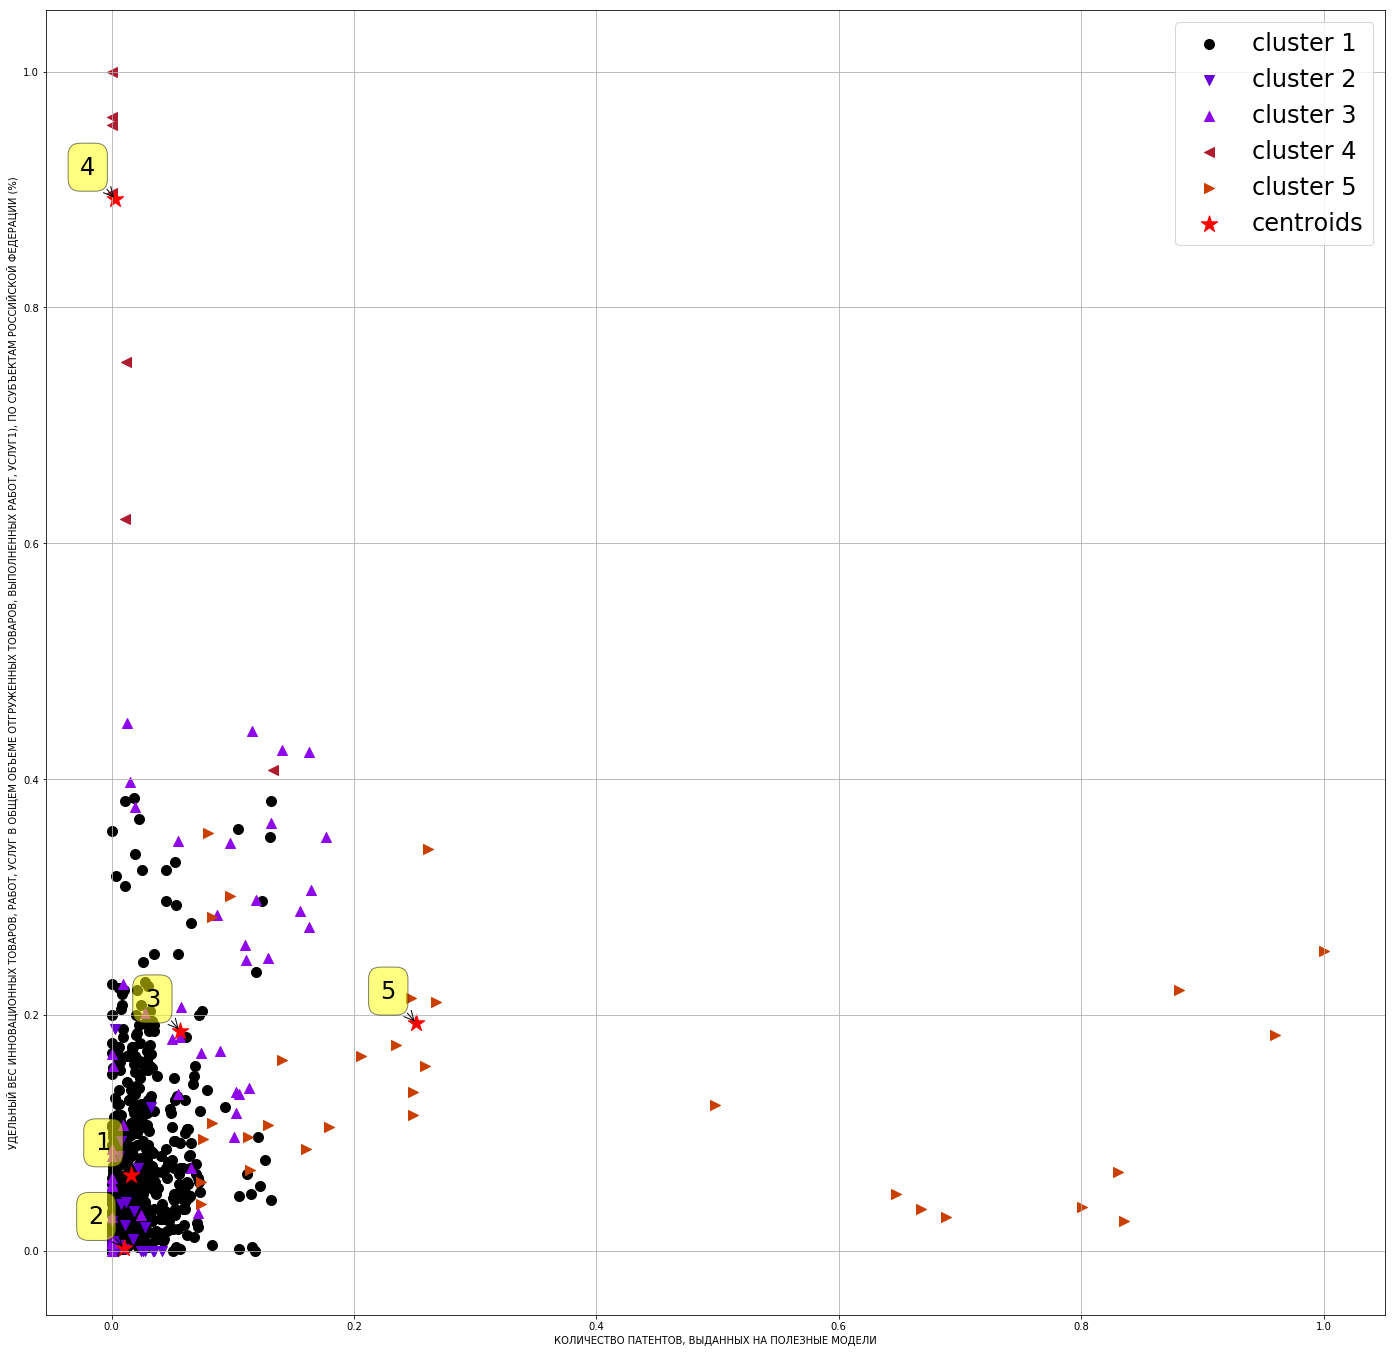

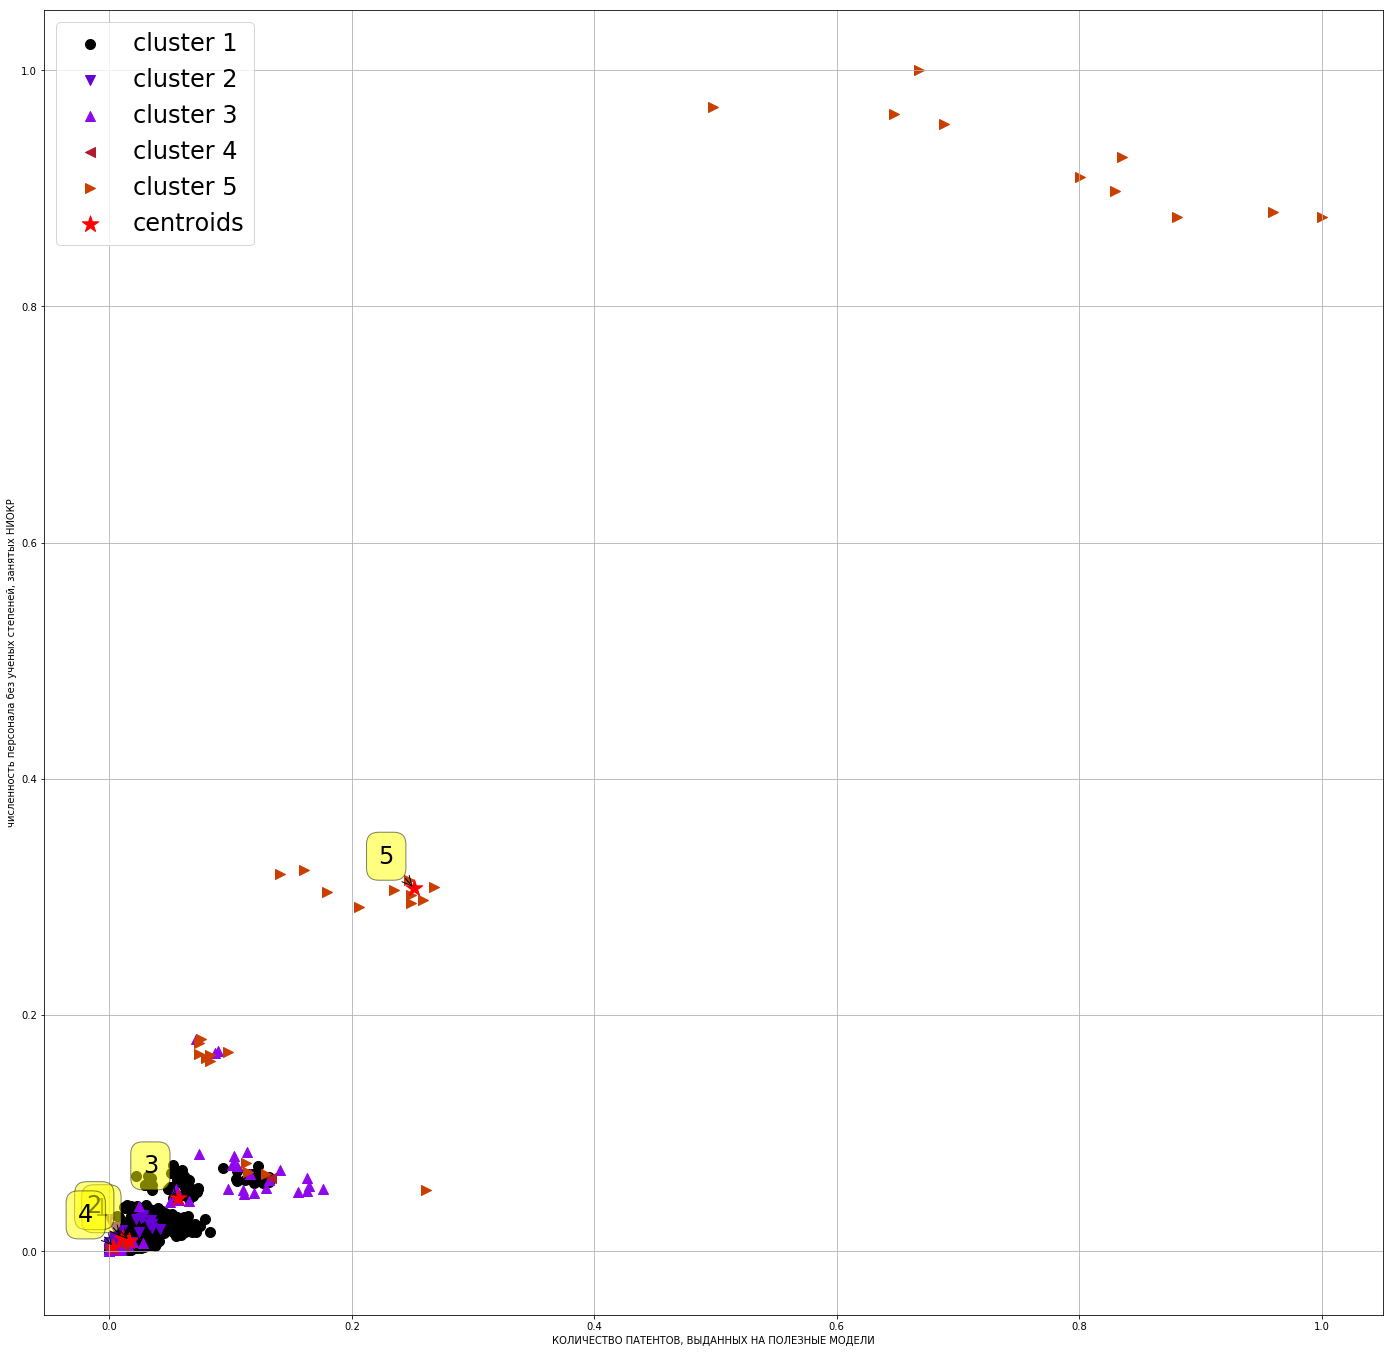

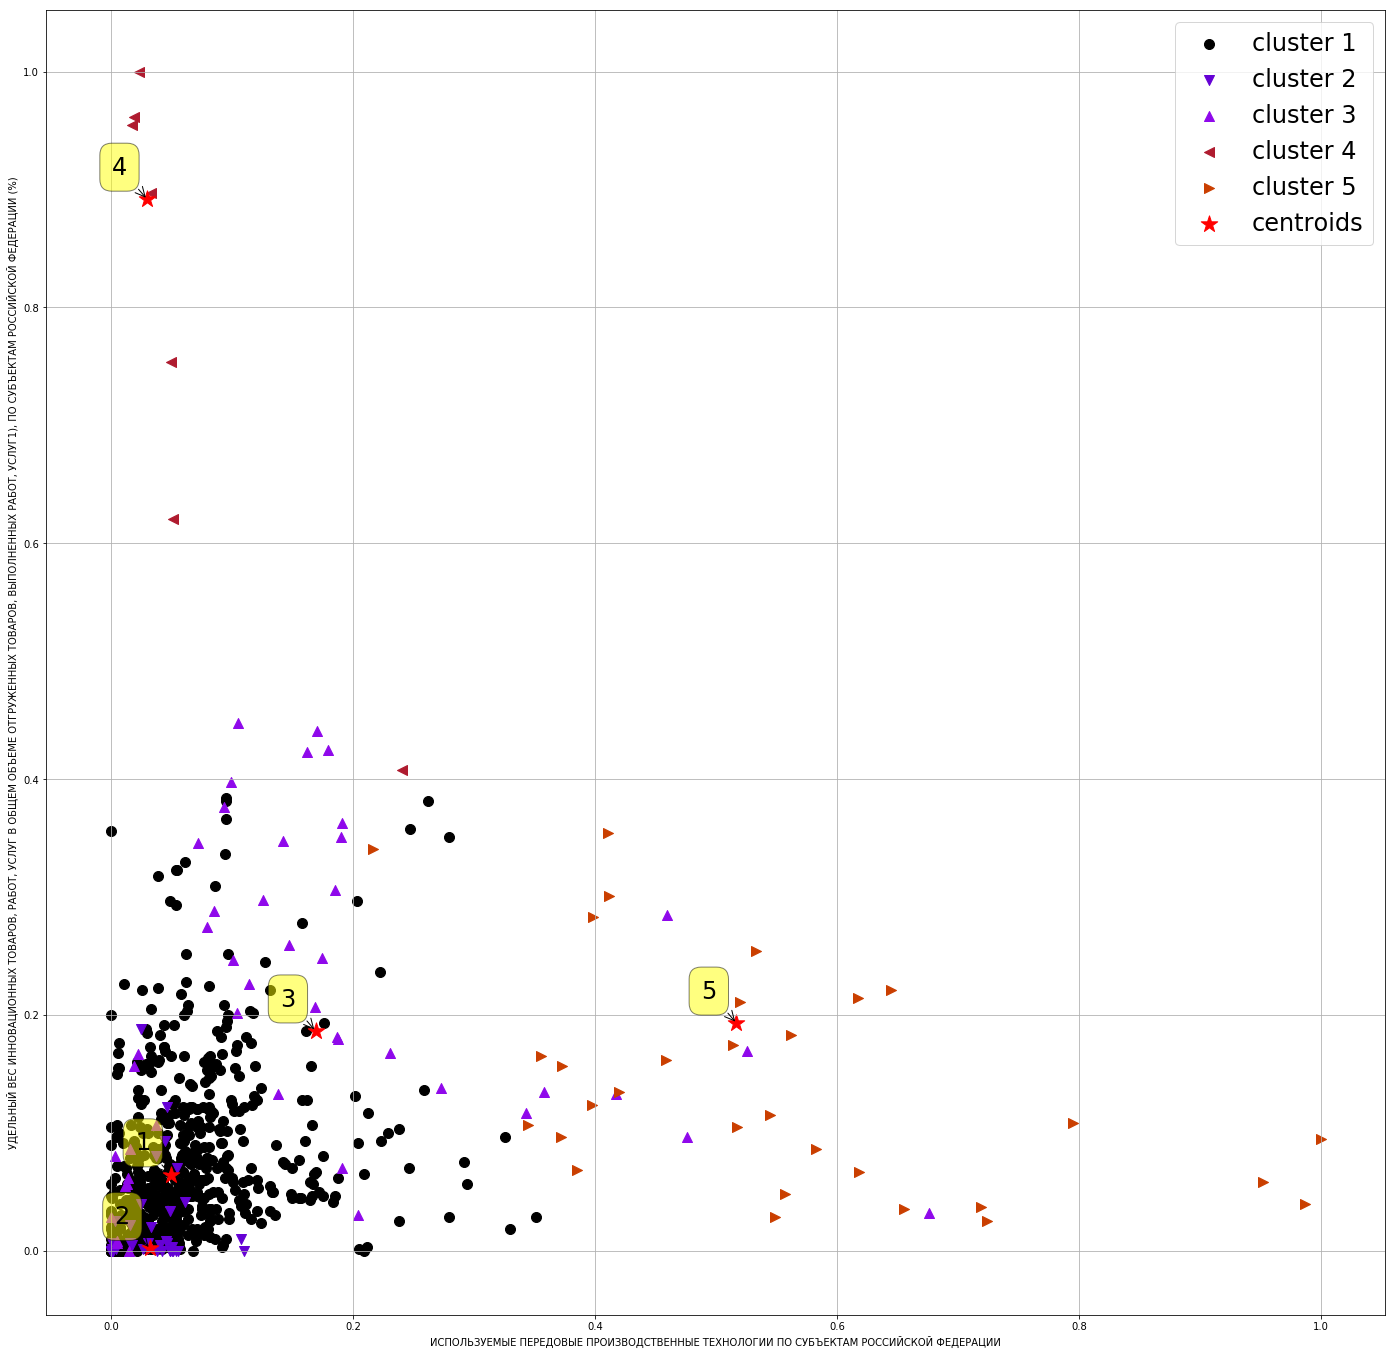

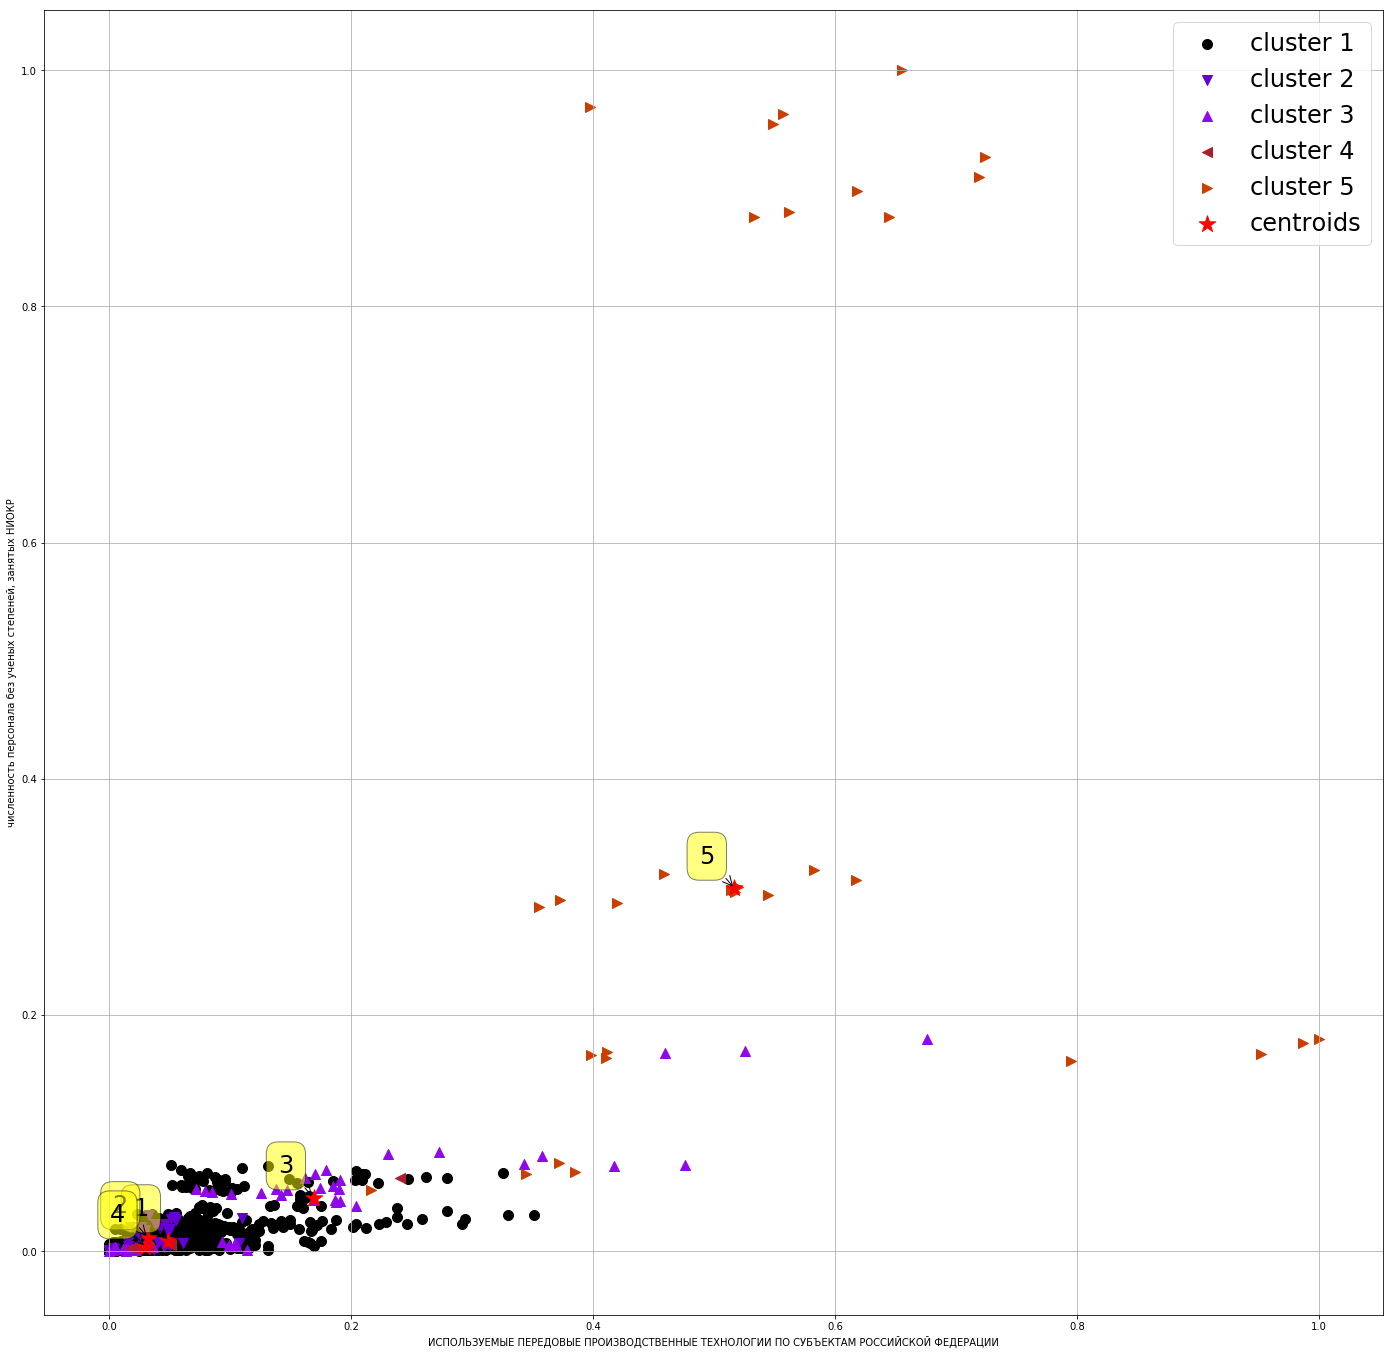

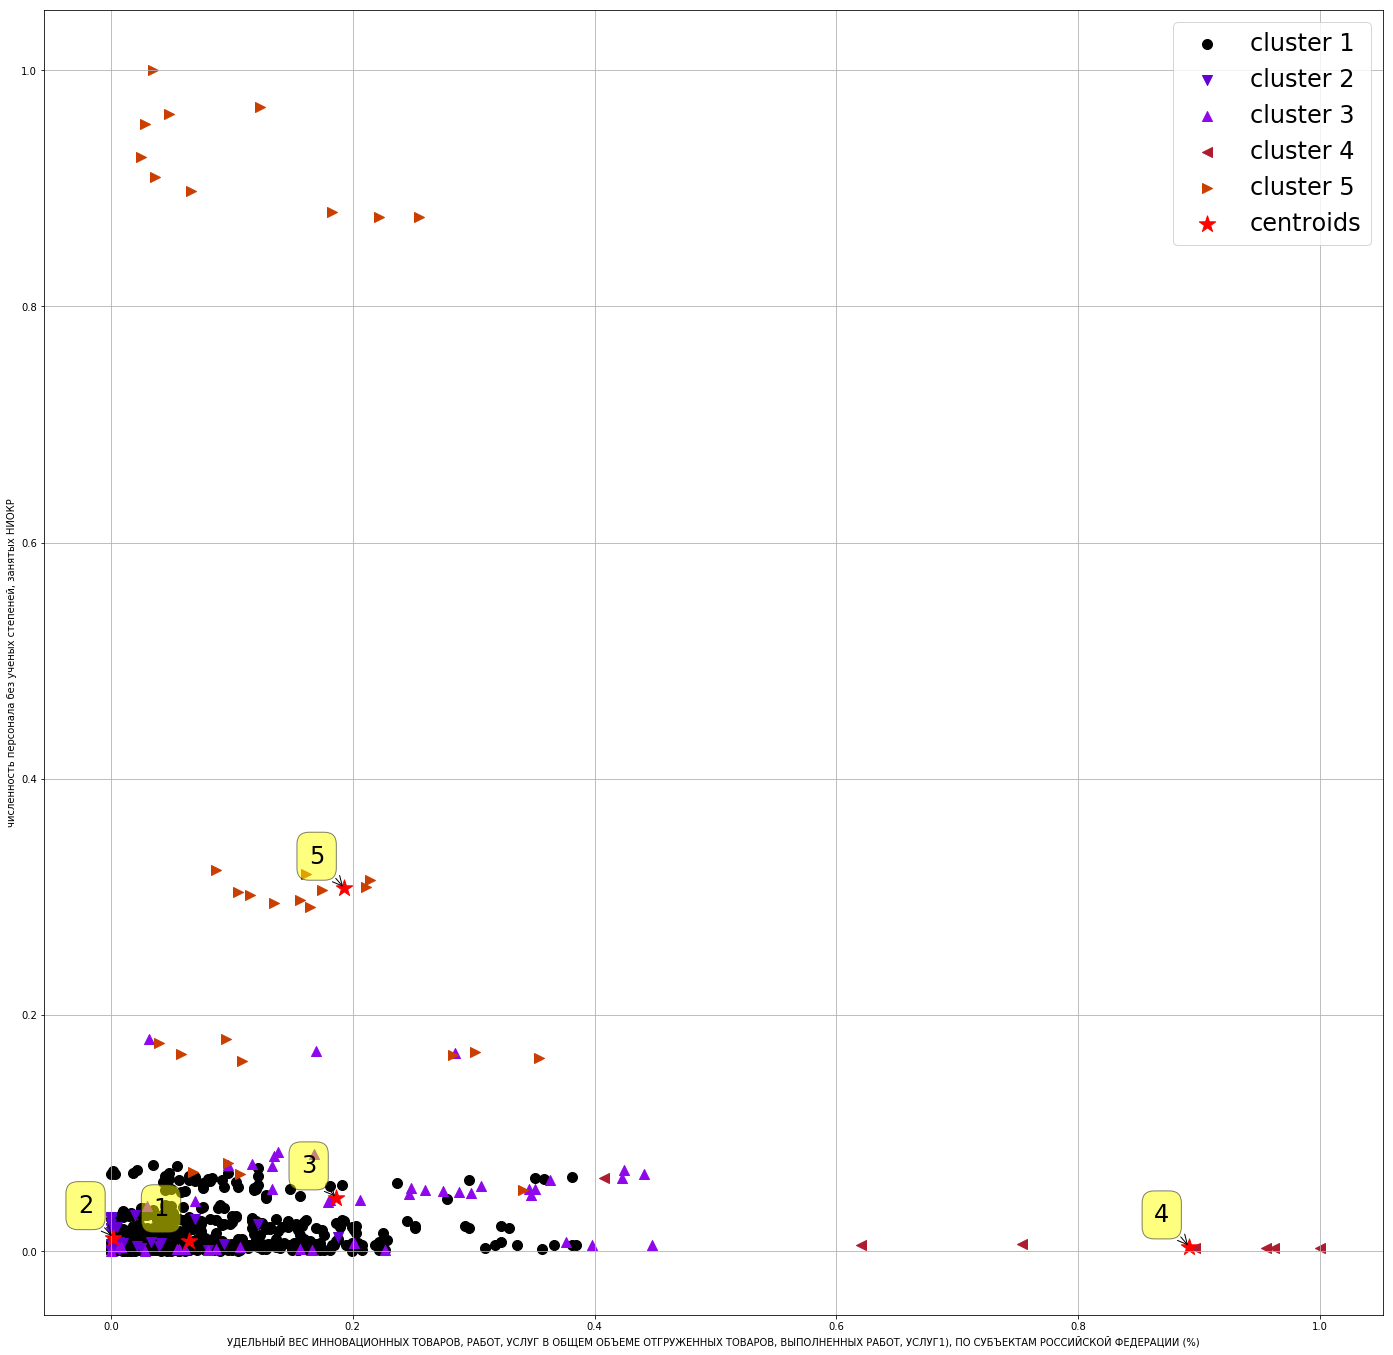

In [117]:
drawer = clusters_drawer.ClustersDrawer(
    plt,
    ms,
    X,
    (10, 7, 9, 14, 1),
    features_names=features_names_ru
)
drawer.data_point_size = 100
drawer.draw()

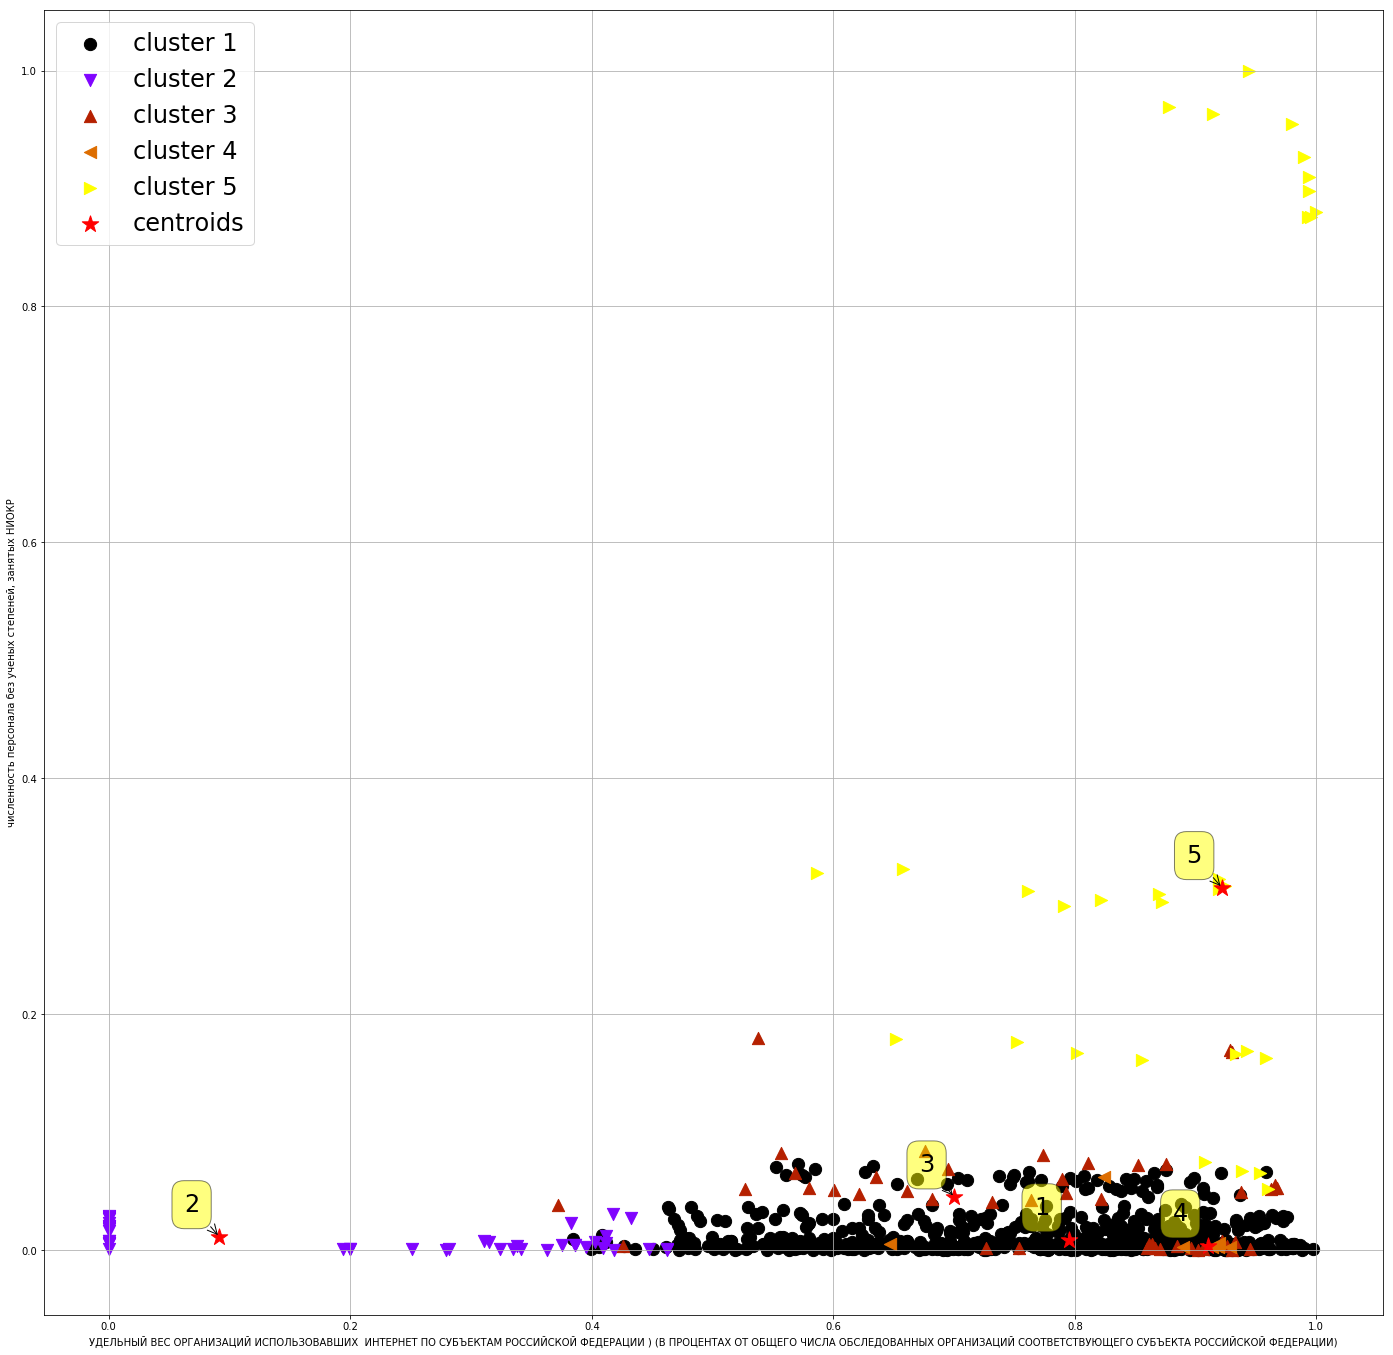

In [118]:
drawer = clusters_drawer.ClustersDrawer(plt, ms, X, (10, 1), features_names=features_names_ru)
drawer.data_point_size = 150
drawer.colormap = 'gnuplot'
drawer.colorstep = 64
drawer.draw()

In [119]:
drawer.colorstep

64

Следующие шаги:
1. Отрисовать все попарные проекции наиболее значимых features отобранных различными методами определения значимости (GradientBoosting, ExtraTreeClassifier).
2. Отрисовать графические представления кроскорреляционных матриц как описано здесь: https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/, и https://python-graph-gallery.com/111-custom-correlogram/.
3. Отрисовать кластеры регионов на карте регионов (по годам).
4. Попробовать обучить классификаторы (п.1) используя подмножества признаков отобранных по уровню значимости другими классификаторами.
5. Попробовать другие методы уменьшения размерности.
6. Другие методы кластеризации?
7. Интерпретация результатов.

In [120]:
print(hier_concatenated_df.index)

MultiIndex(levels=[[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [121]:
print(type(ms.labels_))
hier_concatenated_df['cluster_label'] = ms.labels_

<class 'numpy.ndarray'>


In [122]:
print(hier_concatenated_df['cluster_label'][:10])

Year  Region
2005  0         0
      1         1
      2         0
      3         0
      4         1
      5         0
      6         1
      7         1
      8         0
      9         4
Name: cluster_label, dtype: int64


In [123]:
cluster1 = hier_concatenated_df.loc[hier_concatenated_df['cluster_label'] == 0]

In [124]:
cluster1.shape

(641, 20)

In [125]:
clusters = [hier_concatenated_df.loc[hier_concatenated_df['cluster_label'] == i] for i in range(5)] 

In [126]:
for cluster in clusters:
    print(cluster.shape)

(641, 20)
(45, 20)
(46, 20)
(7, 20)
(31, 20)


In [127]:
print(clusters[1])

                                   Region  OrganizationNum  StaffNum  PhDNum  \
Year Region                                                                    
2005 1                   Брянская область               20      1136      44   
     4                 Ивановская область               30       435     196   
     6                Костромская область                8        71      18   
     7                    Курская область               23       713      66   
     12                Смоленская область               14       299      51   
     14                  Тверская область               42      2583     423   
     20             Архангельская область               24       723     104   
     29               Республика Калмыкия                8        67      66   
     35              Республика Ингушетия                1        11       7   
     36              Чеченская Республика                5        55      82   
     40               Республика Мордови

In [128]:
print(clusters[2])

                                 Region  OrganizationNum  StaffNum  PhDNum  \
Year Region                                                                  
2005 10               Орловская область               18       330      87   
     15                Тульская область               22      3698     154   
     41            Республика Татарстан               83      5040    1110   
     44                   Пермский край               55      5110     470   
     46           Нижегородская область              101     17355    1746   
     49               Самарская область               51      6335     458   
     53            Свердловская область              117      7957    1764   
2006 41            Республика Татарстан               81      4908    1089   
     44                   Пермский край               52      4609     445   
     49               Самарская область               52      6011     451   
     53            Свердловская область              114      81

In [129]:
print(clusters[3])

                            Region  OrganizationNum  StaffNum  PhDNum  \
Year Region                                                             
2007 40        Республика Мордовия               13       484      74   
2011 74        Сахалинская область               15       262      83   
2012 49          Самарская область               61      5996     407   
     74        Сахалинская область               16       244      85   
2013 20      Архангельская область               28       586     130   
     74        Сахалинская область               17       234     104   
2014 74        Сахалинская область               18       262     110   

             Ph.DNum  PostgraduateNum  DoctoralNum  PatentNum  \
Year Region                                                     
2007 40           13              862          0.0       31.0   
2011 74           18              176          0.0        6.0   
2012 49          105             3147        110.0      419.0   
     74          

In [130]:
print(clusters[4])

                            Region  OrganizationNum  StaffNum  PhDNum  \
Year Region                                                             
2005 9          Московская область              206     30899    6456   
     17                     Москва              787     93778   32695   
2006 9          Московская область              243     31257    6550   
     17                     Москва              785     93204   32295   
     46      Нижегородская область              111     17350    1726   
2007 9          Московская область              267     29444    6695   
     17                     Москва              837     96783   32731   
     46      Нижегородская область              107     17084    1875   
2008 9          Московская область              261     28210    6634   
     17                     Москва              787     92359   31598   
     46      Нижегородская область               97     16134    1908   
2009 9          Московская область              254

In [131]:
'''
sns.pairplot(scaled_with_dropped_regions_hier_concantenated_df, kind='scatter')
plt.show()
'''

"\nsns.pairplot(scaled_with_dropped_regions_hier_concantenated_df, kind='scatter')\nplt.show()\n"

In [132]:
rus_adm_units = shapefile.Reader('unzip/RUS_adm1')

In [133]:
rus_adm_units_records = rus_adm_units.records()
print(rus_adm_units_records)
rus_adm_units_shapes = rus_adm_units.shapes()

[[188, 'RUS', 'Russia', 1, 'Adygey', 'RU.AD', 0, '0', 'Respublika', 'Republic', 'Республика Адыгея', 'Adygea|Adygeya|Adygheya|Republic of Adygeya|Adygeyskaya A.Obl.|Respublika Adygeya'], [188, 'RUS', 'Russia', 2, 'Altay', 'RU.AL', 0, '0', 'Kray', 'Territory', 'Алтайский край', 'Altayskiy Kray'], [188, 'RUS', 'Russia', 3, 'Amur', 'RU.AM', 0, '0', 'Oblast', 'Region', 'Амурская область', 'Amurskaya Oblast'], [188, 'RUS', 'Russia', 4, "Arkhangel'sk", 'RU.AR', 0, '0', 'Oblast', 'Region', 'Архангельская область', 'Arcangelo|Archangel|Archangelsk|Arkhangelskaya Oblast'], [188, 'RUS', 'Russia', 5, "Astrakhan'", 'RU.AS', 0, '0', 'Oblast', 'Region', 'Астраханская область', 'Astrachan|Astrakhanskaya Oblast'], [188, 'RUS', 'Russia', 6, 'Bashkortostan', 'RU.BK', 0, '0', 'Respublika', 'Republic', 'Республика Башкортостан', 'Bashkir|Bashkiriya|Bashkirskaya A.S.S.R.|Republic of Bashkortostan|Respublika Bashkortostan'], [188, 'RUS', 'Russia', 7, 'Belgorod', 'RU.BL', 0, '0', 'Oblast', 'Region', 'Белгоро

In [134]:
num_of_shapes = len(rus_adm_units_shapes)
c_n_s = []
for shape_num in range(num_of_shapes):
    c_n_s.append(rus_adm_units_records[shape_num][1])

In [135]:
c_n_s = np.array(c_n_s)
color_map = plt.get_cmap('Dark2')

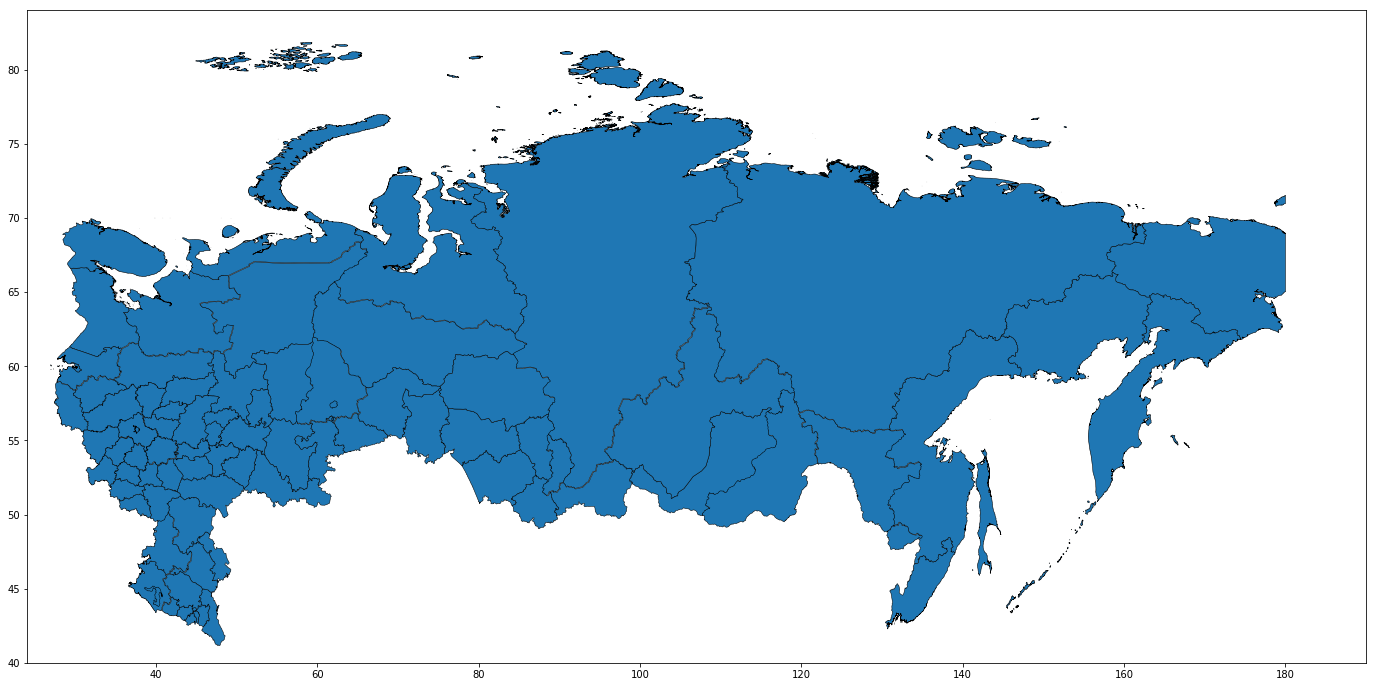

In [136]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111)
for shape_num in range(num_of_shapes):
    patches_list = []
    points = np.array(rus_adm_units_shapes[shape_num].points)
    parts = rus_adm_units_shapes[shape_num].parts
    #print(dir(parts))
    #print(type(parts))
    #print(points.shape)
    #print()
    par = list(parts) + [points.shape[0]]

    for point_i_j in range(len(parts)):
        patches_list.append(patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]]))
    ax.add_collection(collections.PatchCollection(patches_list, edgecolor='k', linewidths=.5))

ax.set_xlim(24, +190)
ax.set_ylim(40, 84)
plt.show()

In [137]:
for record in rus_adm_units_records:
    print(record[10])

Республика Адыгея
Алтайский край
Амурская область
Архангельская область
Астраханская область
Республика Башкортостан
Белгородская область
Брянская область
Республика Бурятия
Республика Чечено-Ингушска
Челябинская область
Чукотский АОк
Чувашская Республика
Санкт-Петербург (горсовет)
Республика Дагестан
Республика Алтай
Респу́блика Ингуше́тия
Иркутская область
Ивановская область
Кабардино-Балкарская Респу
Калининградская область
Республика Калмыкия
Калужская область
Камчатская край
Карачаево-Черкессия Респуб
Республика Карелия
Кемеровская область
Хабаровский край
Республика Хакасия
Ханты-Мансийский АОк
Кировская область
Республика Коми
Костромская область
Краснодарский край
Красноярский край
Курганская область
Курская область
Ленинградская область
Липецкая область
Магаданская область
Республика Марий Эл
Республика Мордовия

Московская область
Мурманская область
Ненецкий АОк
Нижегородская область
Республика Северная Осетия
Новгородская область
Новосибирская область
Омская область
Орловска

In [138]:
#region_map_names = [(record[3], record[10]) if record[10] else (record[3], 'Москва') for record in rus_adm_units_records]
region_map_names = [record[10] if record[10] else 'Москва' for record in rus_adm_units_records]

In [139]:
region_map_names[4]

'Астраханская область'

In [140]:
clusters0 = clusters[0]

In [141]:
#clusters0.loc[2005]['Region'].values

In [142]:
#region_map_names

In [143]:
cutted_name_part = ('край', 'область', 'республика', 'аок', 'аоб', '', '(якутия)', 'респу', 'респуб', '(горсовет)', 'автономный', 'автономная', 'округ', 'респу́блика')
def extract_main_name_part(name):
    lower_case_name = name.lower()
    splitted_name = lower_case_name.split(' ')
    main_name_part_components = []
    for name_part in splitted_name:
        if name_part not in cutted_name_part:
            main_name_part_components.append(name_part)
    return ' '.join(main_name_part_components)

In [144]:
region_map_names_main_part = [extract_main_name_part(name) for name in region_map_names]

In [145]:
#region_map_names_main_part

In [146]:
cluster0_names = [extract_main_name_part(name) for name in clusters0.loc[2005]['Region'].tolist()]

In [147]:
#cluster0_names

In [148]:
cluster0_map_indexes = []
cluster0_map_names = []
for i, name in enumerate(region_map_names_main_part):
    if name in cluster0_names:
        cluster0_map_indexes.append(i)
        cluster0_map_names.append(name)
    else:
        print(name)
print(cluster0_map_indexes)

амурская
архангельская
брянская
бурятия
чечено-ингушска
санкт-петербург
ингуше́тия
ивановская
кабардино-балкарская
калининградская
калмыкия
камчатская
карачаево-черкессия
ханты-мансийский
кировская
костромская
красноярский
курганская
курская
мордовия
москва
московская
нижегородская
северная осетия
орловская
пермская
самарская
смоленская
свердловская
свердловская
свердловская
татарстан
тульская
тыва
тверская
тюменская
ульяновская
ямало-ненецкий
eврейская
забайкальский
[0, 1, 4, 5, 6, 10, 11, 12, 14, 15, 17, 22, 25, 26, 27, 28, 31, 33, 37, 38, 39, 40, 44, 45, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 60, 62, 64, 68, 70, 75, 77, 78, 79, 80, 82]


In [149]:
print(len(cluster0_names))
print(len(cluster0_map_indexes))

47
45


In [150]:
s1 = set(cluster0_names)
s2 = set(cluster0_map_names)

In [151]:
s1.difference(s2)

{'калинингpадская', 'камчатский'}

In [152]:
s1.symmetric_difference(s2)

{'калинингpадская', 'камчатский'}

In [153]:
for name, record in zip(region_map_names_main_part, rus_adm_units_records):
    print(name, record)

адыгея [188, 'RUS', 'Russia', 1, 'Adygey', 'RU.AD', 0, '0', 'Respublika', 'Republic', 'Республика Адыгея', 'Adygea|Adygeya|Adygheya|Republic of Adygeya|Adygeyskaya A.Obl.|Respublika Adygeya']
алтайский [188, 'RUS', 'Russia', 2, 'Altay', 'RU.AL', 0, '0', 'Kray', 'Territory', 'Алтайский край', 'Altayskiy Kray']
амурская [188, 'RUS', 'Russia', 3, 'Amur', 'RU.AM', 0, '0', 'Oblast', 'Region', 'Амурская область', 'Amurskaya Oblast']
архангельская [188, 'RUS', 'Russia', 4, "Arkhangel'sk", 'RU.AR', 0, '0', 'Oblast', 'Region', 'Архангельская область', 'Arcangelo|Archangel|Archangelsk|Arkhangelskaya Oblast']
астраханская [188, 'RUS', 'Russia', 5, "Astrakhan'", 'RU.AS', 0, '0', 'Oblast', 'Region', 'Астраханская область', 'Astrachan|Astrakhanskaya Oblast']
башкортостан [188, 'RUS', 'Russia', 6, 'Bashkortostan', 'RU.BK', 0, '0', 'Respublika', 'Republic', 'Республика Башкортостан', 'Bashkir|Bashkiriya|Bashkirskaya A.S.S.R.|Republic of Bashkortostan|Respublika Bashkortostan']
белгородская [188, 'RUS'

In [154]:
'калининградская' in cluster0_names

False

In [155]:
'калинингpадская' == 'калининградская'

False

In [156]:
s3 = set('калинингpадская')

In [157]:
s3

{'p', 'а', 'г', 'д', 'и', 'к', 'л', 'н', 'с', 'я'}

In [158]:
s4 = set('калининградская')

In [159]:
s4

{'а', 'г', 'д', 'и', 'к', 'л', 'н', 'р', 'с', 'я'}

In [160]:
s5 = s3.symmetric_difference(s4)

In [161]:
#s5[0]

In [162]:
l = list(s5)

In [163]:
l[0] == 'р'

False

In [164]:
l[0] == 'p'

True

In [165]:
def fix_names(region_names):
    sverdlovsk_count = 0
    fixed_names = []
    for name in region_names:
        if name == 'калинингpадская':
            fixed_names.append('калининградская')
        elif name == 'ингуше́тия':
            fixed_names.append('ингушетия')
        elif name == 'свердловская':
            sverdlovsk_count += 1
            if sverdlovsk_count == 3:
                fixed_names.append('свердловск')
            else:
                fixed_names.append(name)
        else:
            fixed_names.append(name)
    return fixed_names

In [166]:
fixed_region_map_names_main_part = fix_names(region_map_names_main_part)

In [167]:
fixed_region_map_names_main_part

['адыгея',
 'алтайский',
 'амурская',
 'архангельская',
 'астраханская',
 'башкортостан',
 'белгородская',
 'брянская',
 'бурятия',
 'чечено-ингушска',
 'челябинская',
 'чукотский',
 'чувашская',
 'санкт-петербург',
 'дагестан',
 'алтай',
 'ингушетия',
 'иркутская',
 'ивановская',
 'кабардино-балкарская',
 'калининградская',
 'калмыкия',
 'калужская',
 'камчатская',
 'карачаево-черкессия',
 'карелия',
 'кемеровская',
 'хабаровский',
 'хакасия',
 'ханты-мансийский',
 'кировская',
 'коми',
 'костромская',
 'краснодарский',
 'красноярский',
 'курганская',
 'курская',
 'ленинградская',
 'липецкая',
 'магаданская',
 'марий эл',
 'мордовия',
 'москва',
 'московская',
 'мурманская',
 'ненецкий',
 'нижегородская',
 'северная осетия',
 'новгородская',
 'новосибирская',
 'омская',
 'орловская',
 'оренбургская',
 'пензенская',
 'пермская',
 'приморский',
 'псковская',
 'ростовская',
 'рязанская',
 'сахалинская',
 'саха',
 'самарская',
 'саратовская',
 'смоленская',
 'ставропольский',
 'свердловск

In [168]:
cluster0_map_indexes = []
cluster0_map_names = []
for i, name in enumerate(fixed_region_map_names_main_part):
    if name in cluster0_names:
        cluster0_map_indexes.append(i)
        cluster0_map_names.append(name)
    else:
        print(name)
print(cluster0_map_indexes)

амурская
архангельская
брянская
бурятия
чечено-ингушска
санкт-петербург
ингушетия
ивановская
кабардино-балкарская
калининградская
калмыкия
камчатская
карачаево-черкессия
ханты-мансийский
кировская
костромская
красноярский
курганская
курская
мордовия
москва
московская
нижегородская
северная осетия
орловская
пермская
самарская
смоленская
свердловская
свердловская
свердловск
татарстан
тульская
тыва
тверская
тюменская
ульяновская
ямало-ненецкий
eврейская
забайкальский
[0, 1, 4, 5, 6, 10, 11, 12, 14, 15, 17, 22, 25, 26, 27, 28, 31, 33, 37, 38, 39, 40, 44, 45, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 60, 62, 64, 68, 70, 75, 77, 78, 79, 80, 82]


In [169]:
s1 = set(cluster0_names)
s2 = set(cluster0_map_names)

In [170]:
s1.difference(s2)

{'калинингpадская', 'камчатский'}

In [171]:
len(merged_df_list)

10

In [172]:
merged_df_list[-1]['Region']

0             Белгородская область
1                 Брянская область
2             Владимирская область
3              Воронежская область
4               Ивановская область
5                Калужская область
6              Костромская область
7                  Курская область
8                 Липецкая область
9               Московская область
10               Орловская область
11               Рязанская область
12              Смоленская область
13              Тамбовская область
14                Тверская область
15                Тульская область
16             Ярославская область
17                          Москва
18              Республика Карелия
19                 Республика Коми
20           Архангельская область
21       Ненецкий автономный округ
22             Вологодская область
23         Калинингpадская область
24           Ленинградская область
25              Мурманская область
26            Новгородская область
27               Псковская область
28               Рес

In [173]:
region_names_from_dataset = merged_df_list[-1]['Region'].tolist()

In [174]:
region_names_from_dataset_main_part = [extract_main_name_part(name) for name in region_names_from_dataset]

In [175]:
fixed_region_names_from_dataset_main_part = fix_names(region_names_from_dataset_main_part)

In [176]:
fixed_region_names_from_dataset_main_part

['белгородская',
 'брянская',
 'владимирская',
 'воронежская',
 'ивановская',
 'калужская',
 'костромская',
 'курская',
 'липецкая',
 'московская',
 'орловская',
 'рязанская',
 'смоленская',
 'тамбовская',
 'тверская',
 'тульская',
 'ярославская',
 'москва',
 'карелия',
 'коми',
 'архангельская',
 'ненецкий',
 'вологодская',
 'калининградская',
 'ленинградская',
 'мурманская',
 'новгородская',
 'псковская',
 'адыгея',
 'калмыкия',
 'краснодарский',
 'астраханская',
 'волгоградская',
 'ростовская',
 'дагестан',
 'ингушетия',
 'чеченская',
 'ставропольский',
 'башкортостан',
 'марий эл',
 'мордовия',
 'татарстан',
 'удмуртская',
 'чувашская',
 'пермский',
 'кировская',
 'нижегородская',
 'оренбургская',
 'пензенская',
 'самарская',
 'саратовская',
 'ульяновская',
 'курганская',
 'свердловская',
 'тюменская',
 'челябинская',
 'алтай',
 'бурятия',
 'тыва',
 'хакасия',
 'алтайский',
 'забайкальский',
 'красноярский',
 'иркутская',
 'кемеровская',
 'новосибирская',
 'омская',
 'томская',
 'с

In [177]:
adm_unit_map_names_set = set(fixed_region_map_names_main_part)

In [178]:
adm_unit_dataset_names_set = set(fixed_region_names_from_dataset_main_part)

In [179]:
adm_unit_map_names_set.symmetric_difference(adm_unit_dataset_names_set)

{'eврейская',
 'еврейская',
 'кабардино-балкарская',
 'камчатская',
 'камчатский',
 'карачаево-черкессия',
 'пермская',
 'пермский',
 'санкт-петербург',
 'свердловск',
 'северная осетия',
 'ханты-мансийский',
 'чечено-ингушска',
 'чеченская',
 'ямало-ненецкий'}

In [180]:
adm_unit_dataset_names_set.difference(adm_unit_map_names_set)

{'еврейская', 'камчатский', 'пермский', 'чеченская'}

In [181]:
adm_unit_map_names_set.difference(adm_unit_dataset_names_set)

{'eврейская',
 'кабардино-балкарская',
 'камчатская',
 'карачаево-черкессия',
 'пермская',
 'санкт-петербург',
 'свердловск',
 'северная осетия',
 'ханты-мансийский',
 'чечено-ингушска',
 'ямало-ненецкий'}

In [182]:
def correct_names_from_unit_map(region_names):
    corrected_region_names = []
    for region_name in region_names:
        if region_name == 'пермская':
            corrected_region_names.append('пермский')
        elif region_name == 'камчатская':
            corrected_region_names.append('камчатский')
        elif region_name == 'чечено-ингушска':
            corrected_region_names.append('чеченская')
        elif region_name == 'eврейская':
            corrected_region_names.append('еврейская')
        else:
            corrected_region_names.append(region_name)
    return corrected_region_names

In [183]:
corrected_region_map_names_main_part = correct_names_from_unit_map(fixed_region_map_names_main_part)

In [184]:
adm_unit_map_names_set = set(corrected_region_map_names_main_part)

In [185]:
adm_unit_map_names_set.difference(adm_unit_dataset_names_set)

{'кабардино-балкарская',
 'карачаево-черкессия',
 'санкт-петербург',
 'свердловск',
 'северная осетия',
 'ханты-мансийский',
 'ямало-ненецкий'}

In [186]:
'еврейская' == 'eврейская'

False

In [187]:
e1_set = set('еврейская')
e2_set = set('eврейская')
e1_set.difference(e2_set)
e2_set.difference(e1_set)

{'e'}

In [188]:
cluster0_map_indexes = []
cluster0_map_names = []
for i, name in enumerate(corrected_region_map_names_main_part):
    if name in cluster0_names:
        cluster0_map_indexes.append(i)
        cluster0_map_names.append(name)
    else:
        print(name)
print(cluster0_map_indexes)

амурская
архангельская
брянская
бурятия
чеченская
санкт-петербург
ингушетия
ивановская
кабардино-балкарская
калининградская
калмыкия
карачаево-черкессия
ханты-мансийский
кировская
костромская
красноярский
курганская
курская
мордовия
москва
московская
нижегородская
северная осетия
орловская
пермский
самарская
смоленская
свердловская
свердловская
свердловск
татарстан
тульская
тыва
тверская
тюменская
ульяновская
ямало-ненецкий
еврейская
забайкальский
[0, 1, 4, 5, 6, 10, 11, 12, 14, 15, 17, 22, 23, 25, 26, 27, 28, 31, 33, 37, 38, 39, 40, 44, 45, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 60, 62, 64, 68, 70, 75, 77, 78, 79, 80, 82]


In [189]:
len(cluster0_map_indexes)

46

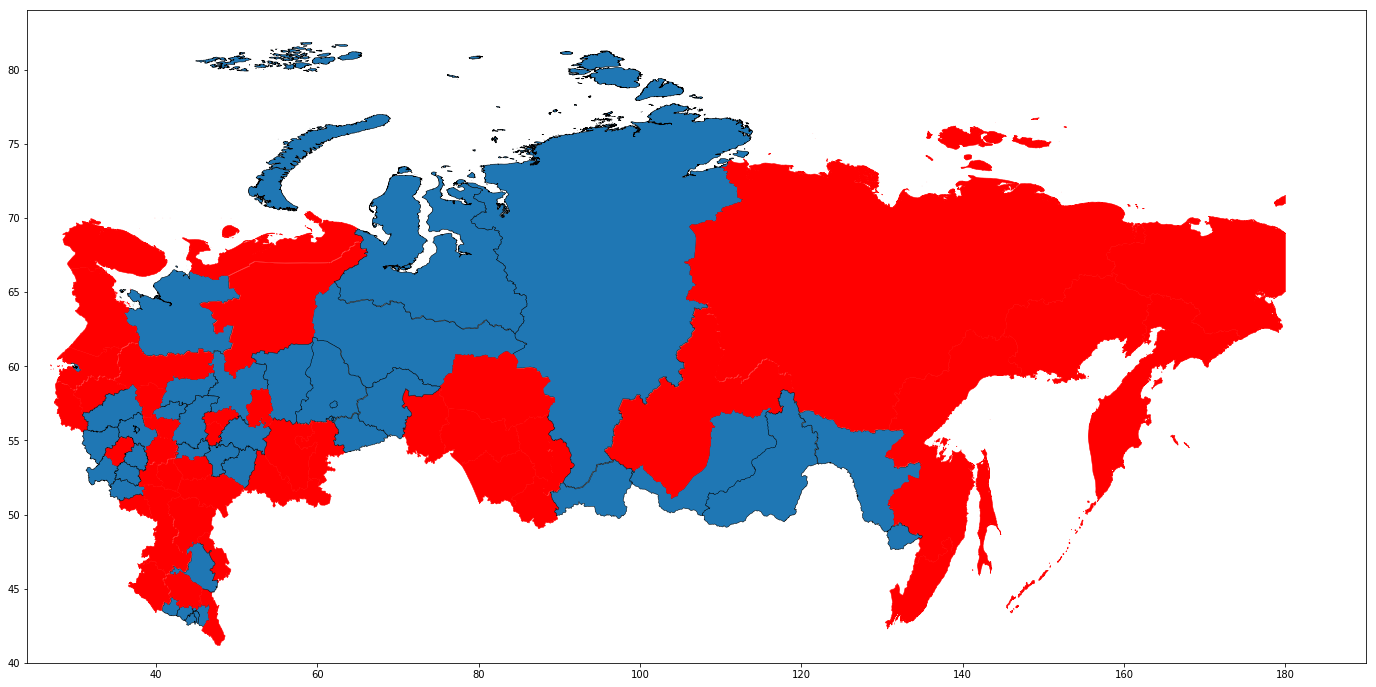

In [190]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111)
for shape_num in range(num_of_shapes):
    patches_list = []
    cluster0_pathches_list = []
    points = np.array(rus_adm_units_shapes[shape_num].points)
    parts = rus_adm_units_shapes[shape_num].parts
    #print(dir(parts))
    #print(type(parts))
    #print(points.shape)
    #print()
    par = list(parts) + [points.shape[0]]

    for point_i_j in range(len(parts)):
        polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]])
        if shape_num in cluster0_map_indexes:
            #polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]], color='green', fill=True)
            cluster0_pathches_list.append(polygon)
        else:
            #polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]])
            patches_list.append(polygon)
    cluster0_collection = collections.PatchCollection(cluster0_pathches_list, edgecolor='k', linewidths=.5)
    cluster0_collection.set_color('red')
    ax.add_collection(collections.PatchCollection(patches_list, edgecolor='k', linewidths=.5))
    ax.add_collection(cluster0_collection)

ax.set_xlim(24, +190)
ax.set_ylim(40, 84)
plt.show()

In [191]:
type(clusters)
len(clusters)

5

In [192]:
'''
def decompose_clusters_by_years(clusters, years):
    clusters_by_years = {}
    for year in years:
        clusters_by_years[year] = [cluster.loc[year] for cluster in clusters]
    return clusters_by_years
'''
def decompose_clusters_by_years(clusters, years):
    return {year: [cluster.loc[year]['Region'] for cluster in clusters] for year in years}
#cluster0_names = [extract_main_name_part(name) for name in clusters0.loc[2005]['Region'].tolist()]

In [193]:
years = range(2005, 2015)

In [194]:
years[2]

2007

In [195]:
clusters_by_years = decompose_clusters_by_years(clusters, years)

In [196]:
clusters_by_years[2008][2]

Region
41    Республика Татарстан
44           Пермский край
49       Самарская область
53    Свердловская область
73     Магаданская область
Name: Region, dtype: object

In [197]:
def extract_sign_part_clustered_names(clusters_by_years):
    sign_names_part = {}
    #print(clusters_by_years)
    for year, clustered_names_list in clusters_by_years.items():
        main_names_parts = [
            [
                extract_main_name_part(name)
                for name in clustered_names
            ]
            for clustered_names in clustered_names_list
        ]
        sign_names_part[year] = [
            fix_names(main_names_parts_cluster)
            for main_names_parts_cluster in main_names_parts
        ]
    return sign_names_part

In [198]:
#clustered_sign_names_parts = extract_sign_part_clustered_names

In [199]:
clustered_sign_names_parts =extract_sign_part_clustered_names(
    clusters_by_years
)

In [200]:

clustered_sign_names_parts[2009][4]

['московская', 'москва', 'нижегородская']

In [201]:
def find_cluster_map_indexes(
        year_clustered_sign_names_parts,
        corrected_region_map_names_main_part
    ):
    year_cluster_map_indexes = []
    year_cluster_map_names = []
    for i, name in enumerate(corrected_region_map_names_main_part):
        if name in year_clustered_sign_names_parts:
            year_cluster_map_indexes.append(i)
            year_cluster_map_names.append(name)
        else:
            print(name)
    #print(cluster0_map_indexes)
    return year_cluster_map_indexes

In [202]:
def clustered_names_to_map_indexes(
        years,
        clustered_sign_names_parts,
        corrected_region_map_names_main_part
    ):
    clustered_map_indexes = {}
    for year in years:
        clustered_map_indexes[year] = [
            find_cluster_map_indexes(
                year_clustered_sign_names_parts,
                corrected_region_map_names_main_part
            ) for year_clustered_sign_names_parts in clustered_sign_names_parts[year]
        ]
    return clustered_map_indexes

In [203]:
clustered_map_indexes = clustered_names_to_map_indexes(
        years,
        clustered_sign_names_parts,
        corrected_region_map_names_main_part
    )

амурская
архангельская
брянская
бурятия
чеченская
санкт-петербург
ингушетия
ивановская
кабардино-балкарская
калмыкия
карачаево-черкессия
ханты-мансийский
кировская
костромская
красноярский
курганская
курская
мордовия
москва
московская
нижегородская
северная осетия
орловская
пермский
самарская
смоленская
свердловская
свердловская
свердловск
татарстан
тульская
тыва
тверская
тюменская
ульяновская
ямало-ненецкий
еврейская
забайкальский
адыгея
алтайский
астраханская
башкортостан
белгородская
челябинская
чукотский
чувашская
санкт-петербург
дагестан
алтай
иркутская
кабардино-балкарская
калининградская
калужская
камчатский
карачаево-черкессия
карелия
кемеровская
хабаровский
хакасия
ханты-мансийский
коми
краснодарский
ленинградская
липецкая
магаданская
марий эл
москва
московская
мурманская
ненецкий
нижегородская
северная осетия
новгородская
новосибирская
омская
орловская
оренбургская
пензенская
пермский
приморский
псковская
ростовская
рязанская
сахалинская
саха
самарская
саратовская
ставропольс

астраханская
башкортостан
белгородская
брянская
бурятия
челябинская
чукотский
чувашская
санкт-петербург
дагестан
алтай
ингушетия
иркутская
ивановская
кабардино-балкарская
калининградская
калмыкия
калужская
камчатский
карачаево-черкессия
карелия
кемеровская
хабаровский
хакасия
ханты-мансийский
кировская
коми
костромская
краснодарский
красноярский
курганская
курская
ленинградская
липецкая
магаданская
марий эл
мордовия
москва
московская
мурманская
ненецкий
нижегородская
северная осетия
новгородская
новосибирская
омская
орловская
оренбургская
пензенская
пермский
приморский
псковская
ростовская
рязанская
сахалинская
саха
самарская
саратовская
смоленская
ставропольский
свердловская
свердловская
свердловск
тамбовская
татарстан
томская
тульская
тверская
удмуртская
ульяновская
владимирская
волгоградская
вологодская
воронежская
ямало-ненецкий
ярославская
еврейская
забайкальский
адыгея
алтайский
амурская
архангельская
астраханская
башкортостан
белгородская
брянская
бурятия
чеченская
челябинская
ч

ингушетия
иркутская
ивановская
кабардино-балкарская
калининградская
калмыкия
калужская
камчатский
карачаево-черкессия
карелия
кемеровская
хабаровский
хакасия
ханты-мансийский
кировская
коми
костромская
краснодарский
красноярский
курганская
курская
ленинградская
липецкая
марий эл
москва
московская
мурманская
ненецкий
нижегородская
северная осетия
новгородская
новосибирская
омская
орловская
оренбургская
пензенская
пермский
приморский
псковская
ростовская
рязанская
сахалинская
саха
самарская
саратовская
смоленская
ставропольский
свердловская
свердловская
свердловск
тамбовская
томская
тульская
тыва
тверская
тюменская
удмуртская
ульяновская
владимирская
волгоградская
вологодская
воронежская
ямало-ненецкий
ярославская
еврейская
забайкальский
адыгея
алтайский
амурская
астраханская
башкортостан
белгородская
брянская
бурятия
чеченская
челябинская
чукотский
чувашская
санкт-петербург
дагестан
алтай
ингушетия
иркутская
ивановская
кабардино-балкарская
калининградская
калмыкия
калужская
камчатский
к

In [204]:
clustered_map_indexes[2007]

[[0,
  1,
  2,
  4,
  5,
  6,
  7,
  8,
  10,
  11,
  12,
  14,
  15,
  17,
  18,
  20,
  21,
  22,
  23,
  25,
  26,
  27,
  28,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  44,
  45,
  48,
  49,
  50,
  51,
  52,
  53,
  55,
  56,
  57,
  58,
  59,
  60,
  62,
  63,
  64,
  68,
  70,
  71,
  73,
  75,
  76,
  77,
  78,
  79,
  80,
  82,
  83,
  84],
 [3, 9, 16, 72, 74],
 [54, 61, 65, 66, 69],
 [41],
 [42, 43, 46]]

In [215]:
def draw_clustered_regions(year_clustered_map_indexes, cluster_colors, adm_units_shapes):
    num_of_shapes = len(adm_units_shapes)
    fig = plt.figure(figsize=(24, 12))
    ax = fig.add_subplot(111)
    list_of_pathes_list = []
    #non_clustered_index_set = set()
    #non_clustered_index_set = []
    non_clustered_index_set = list(range(num_of_shapes))
    non_clustred_pathes_list = []
    for cluster_map_indexes, cluster_color in zip(year_clustered_map_indexes, cluster_colors):
        #for shape_num in range(num_of_shapes):
        clustered_index_set = []
        text_xy_list = []
        for shape_num in non_clustered_index_set:
            #print("shape_num: ", shape_num)
            #patches_list = []
            cluster_pathes_list = []
            points = np.array(adm_units_shapes[shape_num].points)
            #text_xy_list.append((points[:, 0].mean(), points[:, 1].mean()))
            bbox = adm_units_shapes[shape_num].bbox
            text_xy_list.append(((bbox[0] + bbox[2]) / 2, (bbox[1] + bbox[3]) / 2))
            parts = adm_units_shapes[shape_num].parts
            #print(dir(parts))
            #print(type(parts))
            #print(points.shape)
            #print()
            par = list(parts) + [points.shape[0]]
            #text_xy_list = []
            #print("len(parts)", len(parts))
            for point_i_j in range(len(parts)):
                #polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]])
                if shape_num in cluster_map_indexes:
                    #polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]], label=str(shape_num))
                    polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]])
                    #verticies = polygon.get_xy()
                    #print(len(verticies))
                    #print(verticies[0], verticies[-1])
                    #text_x = verticies[0:-1, 0].mean()
                    #text_y = verticies[0:-1, 1].mean()
                    #text_xy_list.append((text_x, text_y))
                    #print(polygon)
                    #print(dir(polygon))
                    #polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]], color='green', fill=True)
                    cluster_pathes_list.append(polygon)
                    clustered_index_set.append(shape_num)
                    #if shape_num in non_clustered_index_set:
                    #    non_clustered_index_set.remove(shape_num)
                #else:
                    #non_clustered_index_set.append(shape_num)
                    '''
                    if shape_num in non_clustered_index_set:
                        non_clustered_index_set.remove(shape_num)
                    else:
                        #non_clustered_index_set.add(shape_num)
                        non_clustered_index_set.append(shape_num)
                    '''

            list_of_pathes_list.append(cluster_pathes_list)
            cluster_collection = collections.PatchCollection(cluster_pathes_list, edgecolor='black', linewidths=1.0)
            cluster_array = cluster_collection.get_array()
            #print(cluster_array)
            #print(cluster_collection.get_clip_box())
            cluster_collection.set_facecolor(cluster_color)
            #ax.add_collection(collections.PatchCollection(patches_list, edgecolor='k', linewidths=.5))
            ax.add_collection(cluster_collection)
            
        for i, text_xy in enumerate(text_xy_list):
            ax.text(text_xy[0], text_xy[1], str(i))
            
        for i in clustered_index_set:
            if i in non_clustered_index_set:
                non_clustered_index_set.remove(i)
    pathes_list = []
    
    for shape_num in non_clustered_index_set:
        points = np.array(adm_units_shapes[shape_num].points)
        parts = adm_units_shapes[shape_num].parts
        par = list(parts) + [points.shape[0]]
        for point_i_j in range(len(parts)):
            polygon = patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]], label=str(shape_num))

            pathes_list.append(polygon)
    non_clustered_collection = collections.PatchCollection(pathes_list, edgecolor='black', linewidths=2.0)
    non_clustered_collection.set_facecolor('purple')
    ax.add_collection(non_clustered_collection)
    '''
    for i, text_xy in enumerate(text_xy_list):
        ax.text(text_xy[0], text_xy[1], str(i))
    '''
    ax.set_xlim(24, +190)
    ax.set_ylim(40, 84)
    #plt.legend()
    plt.show()

Год:  2005


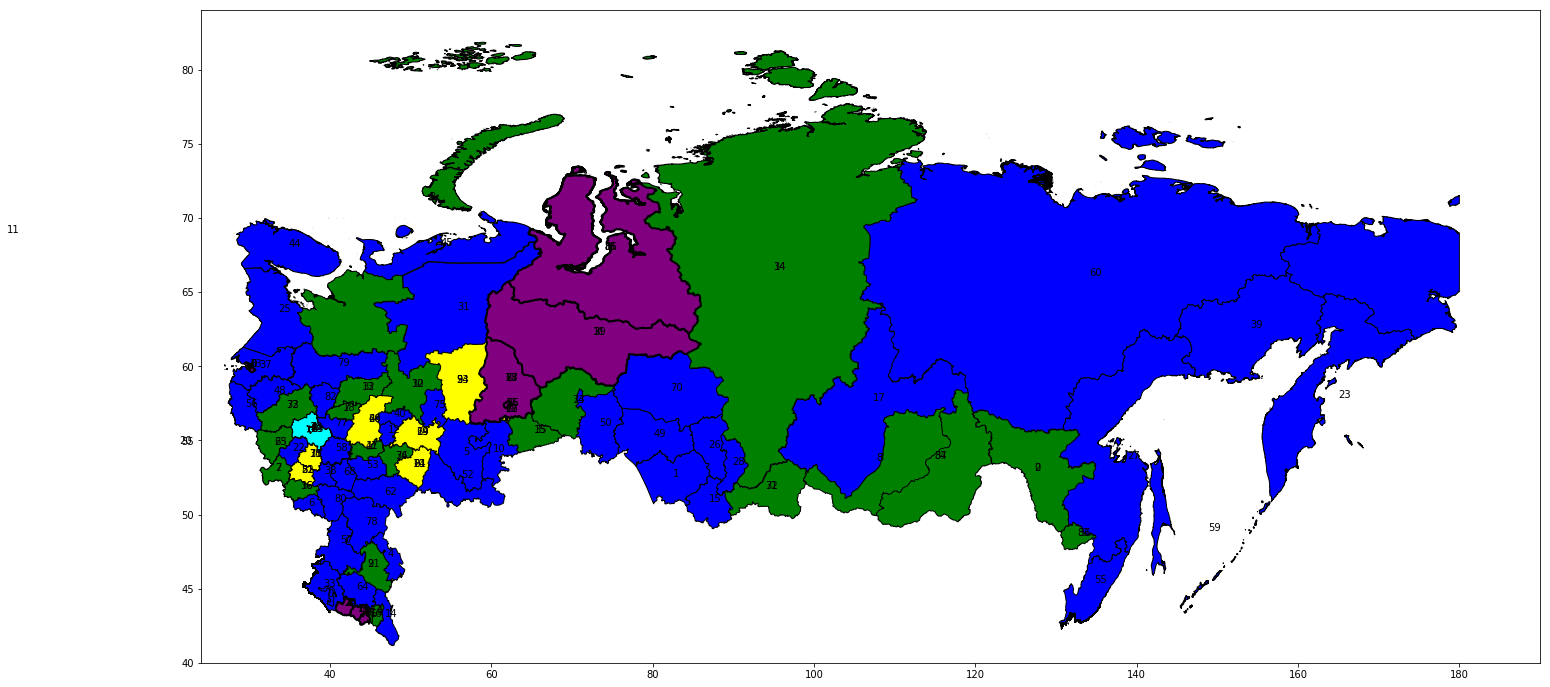

Год:  2006


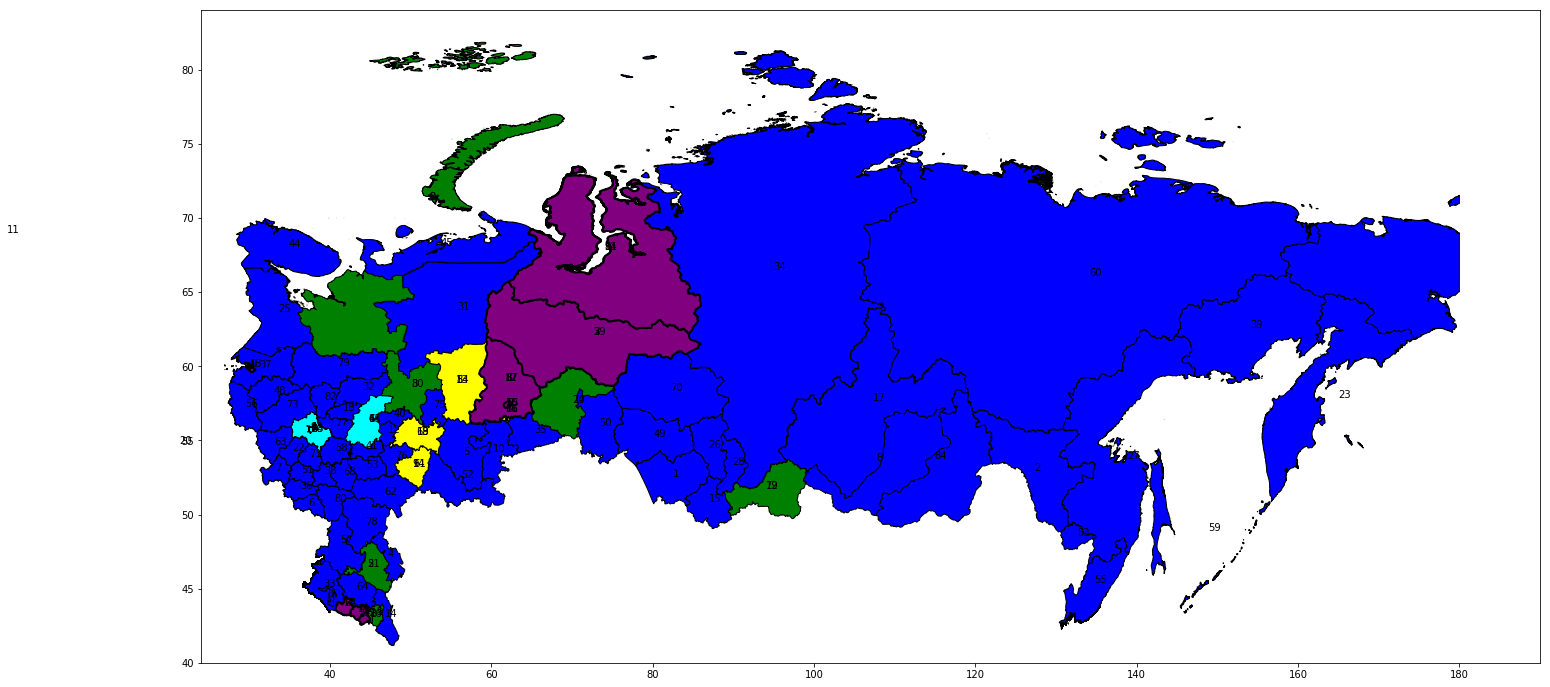

Год:  2007


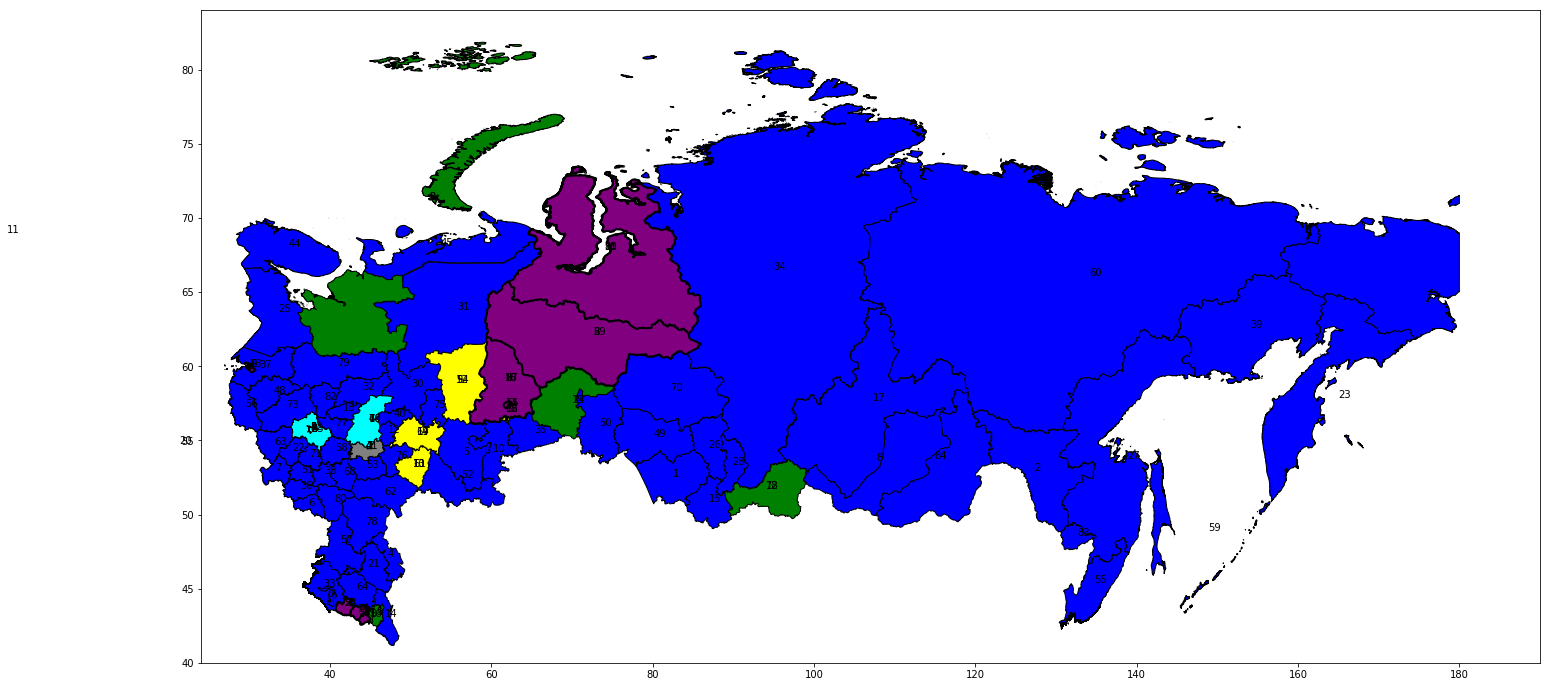

Год:  2008


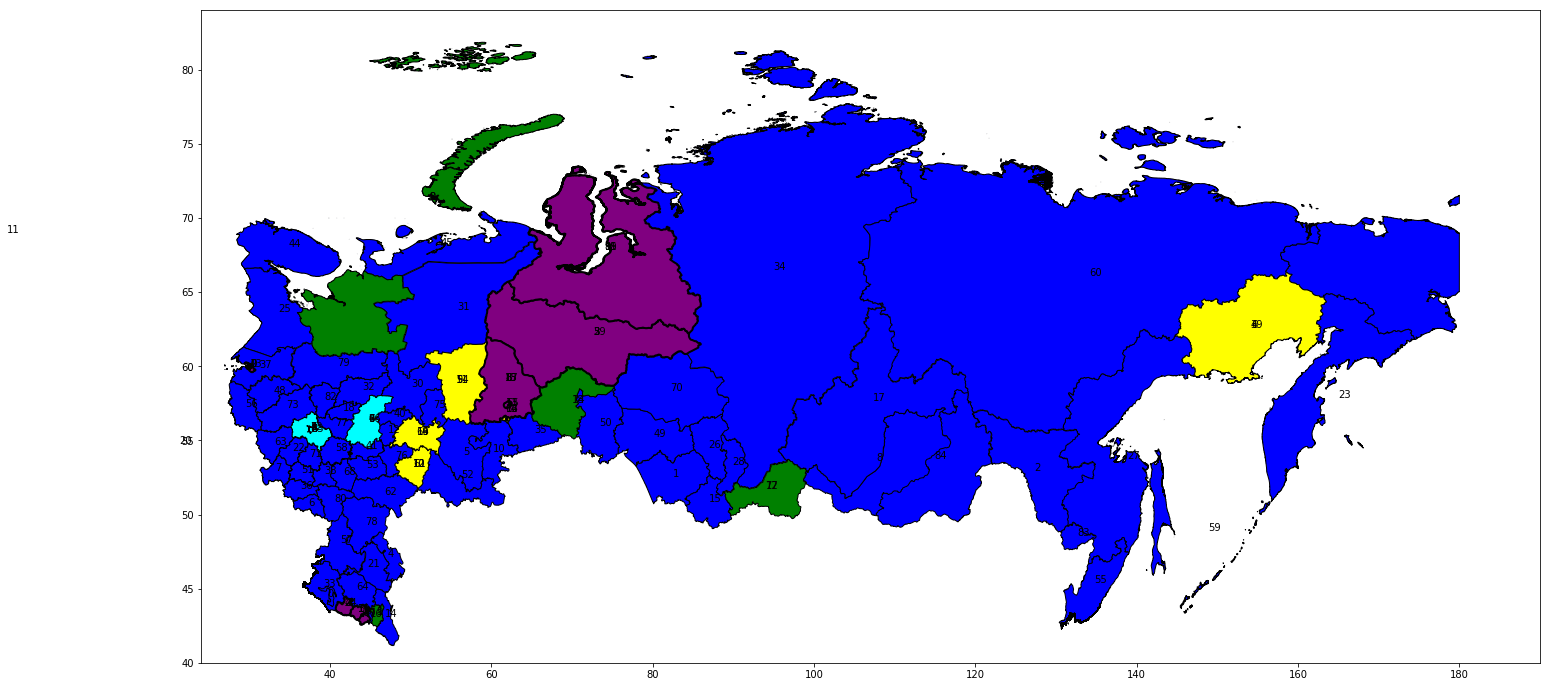

Год:  2009


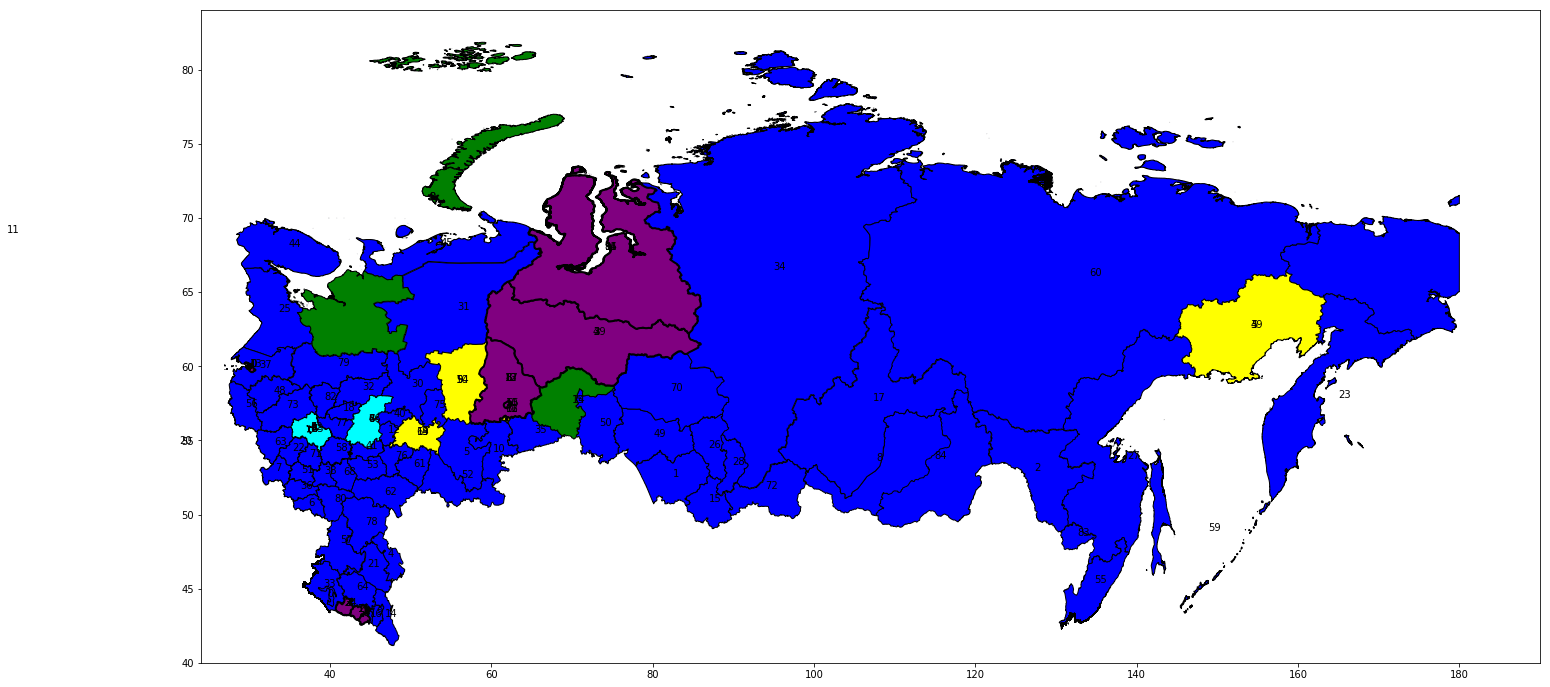

Год:  2010


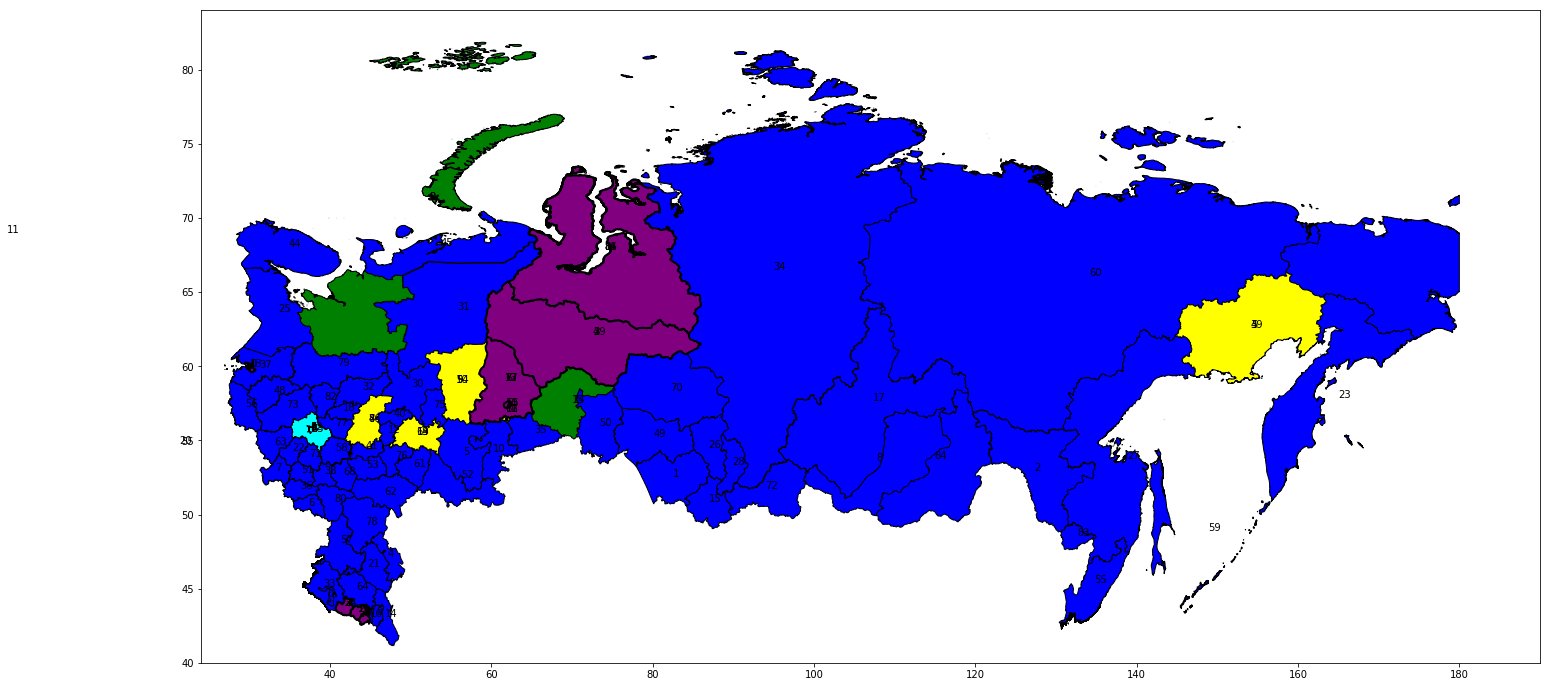

Год:  2011


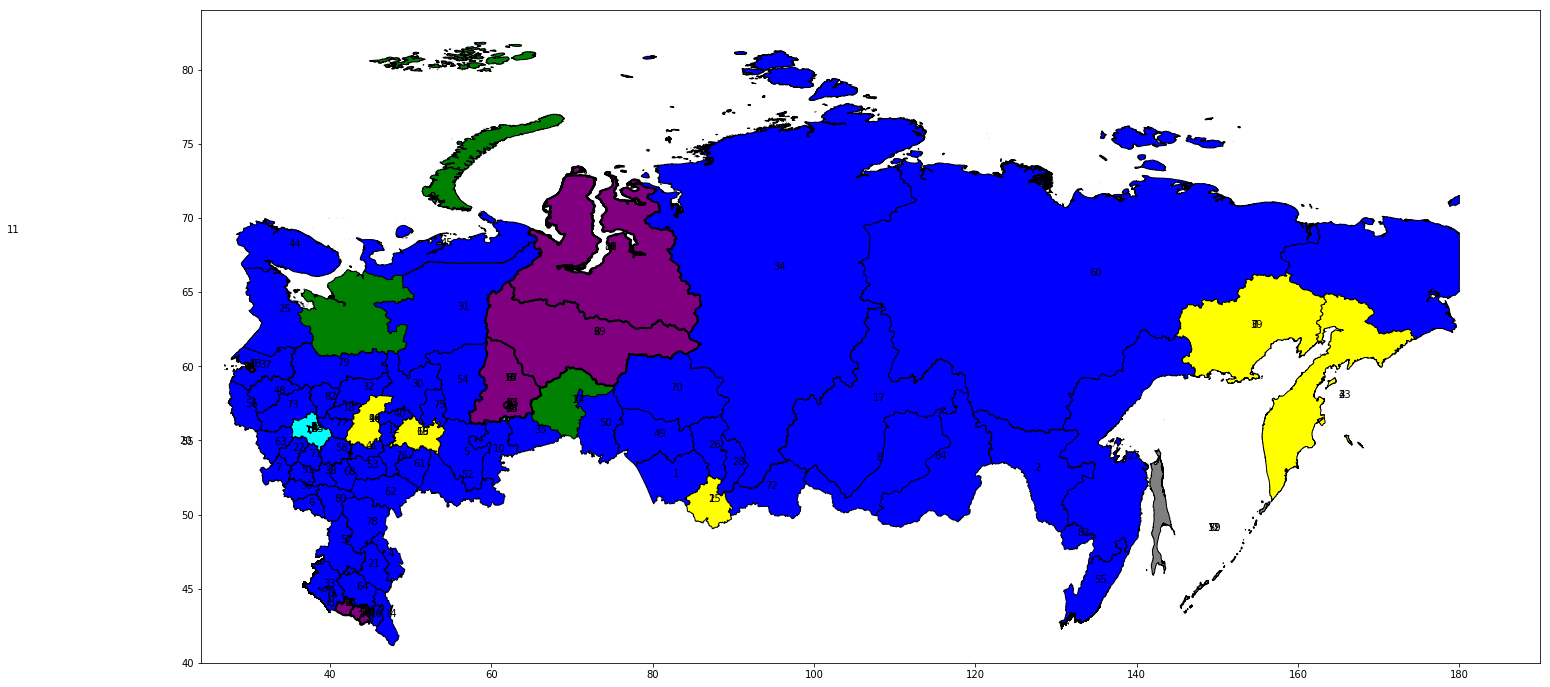

Год:  2012


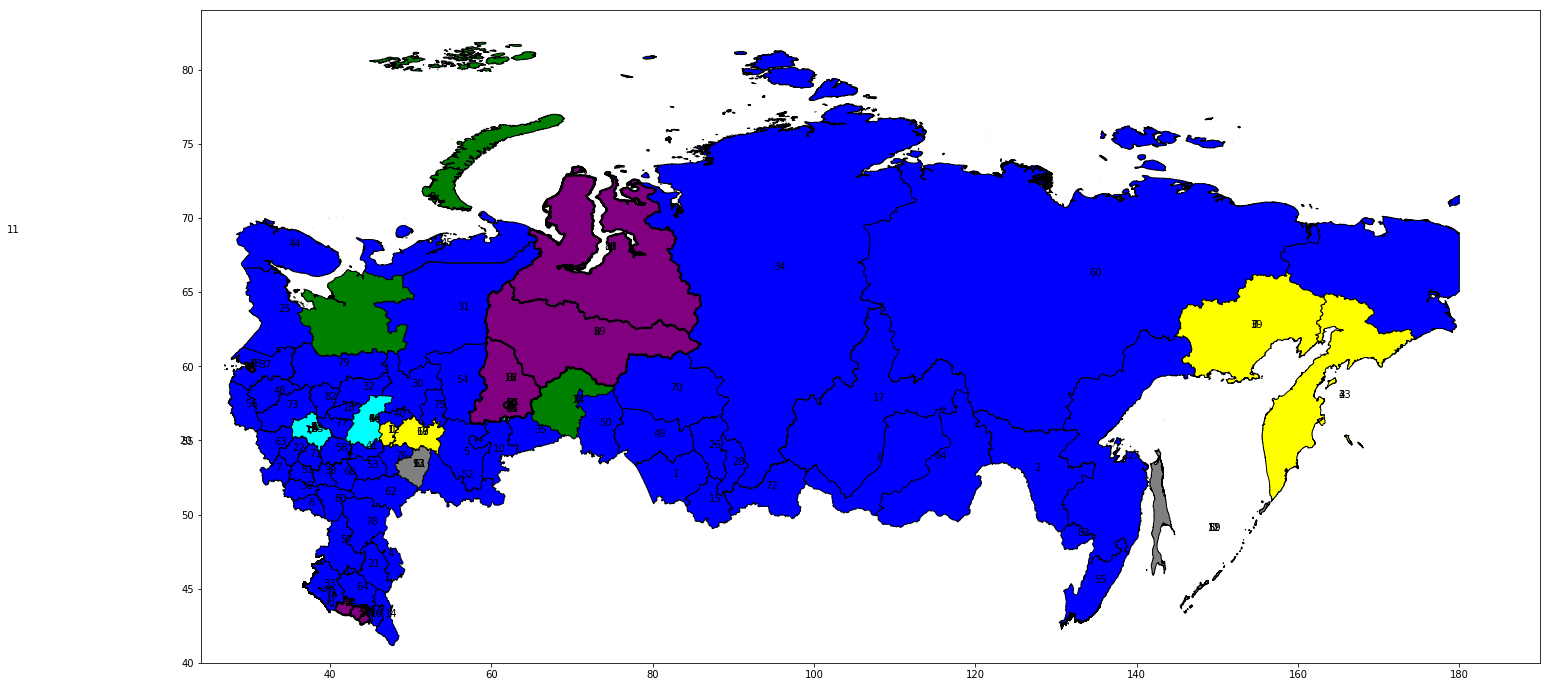

Год:  2013


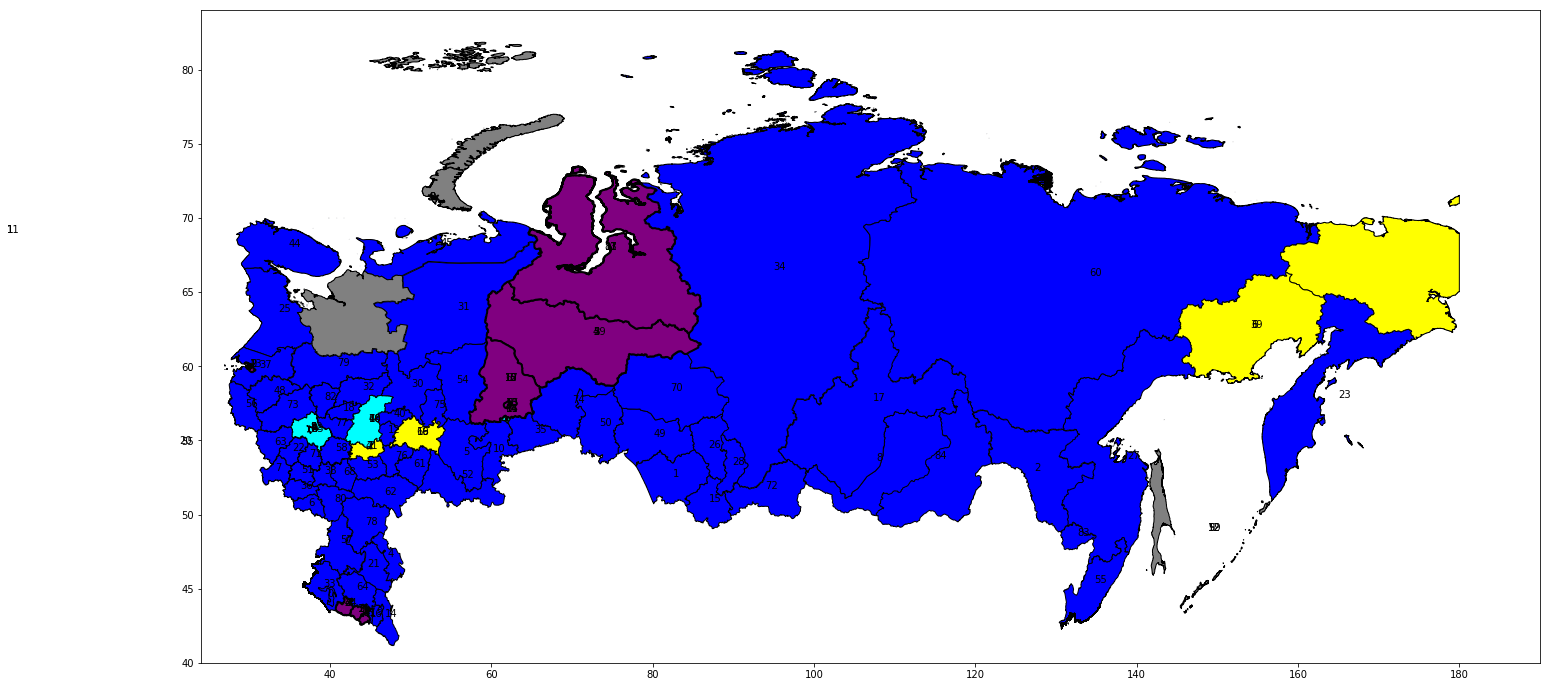

Год:  2014


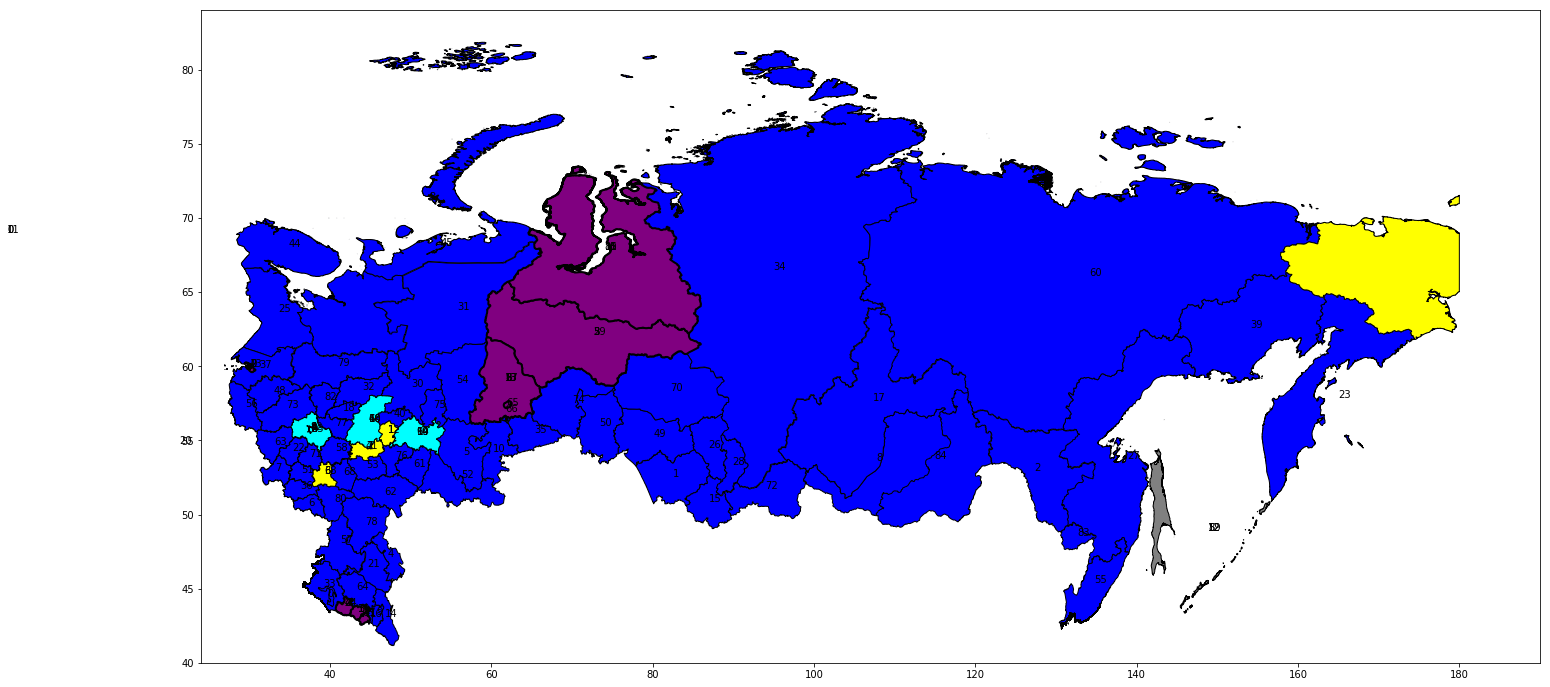

In [216]:
for year in years:
    print("Год: ", year)
    draw_clustered_regions(clustered_map_indexes[year], ['blue', 'green', 'yellow', 'gray', 'cyan'], rus_adm_units_shapes)